### What are the most important factors affecting the houseprices in Ames, IA

[Data Dictionary](https://www.kaggle.com/competitions/project-2-regression-challenge-123/data)

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline

#pd.set_option('display.max_rows', None)
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./datasets/train.csv")
df_test = pd.read_csv("./datasets/test.csv")
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [3]:
df_test.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   

[2 rows x 80 columns]

In [4]:
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [5]:
df_test.columns = df_test.columns.str.lower().str.replace(" ", "_")

In [6]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
df_test['bsmt_qual'].fillna('Gd', inplace = True)
df_test['garage_finish'].fillna("RFn", inplace = True)

In [8]:
df_test['electrical'].fillna('SBrkr', inplace = True)

In [9]:
df_test['garage_cond'].fillna("TA", inplace = True)

<AxesSubplot:>

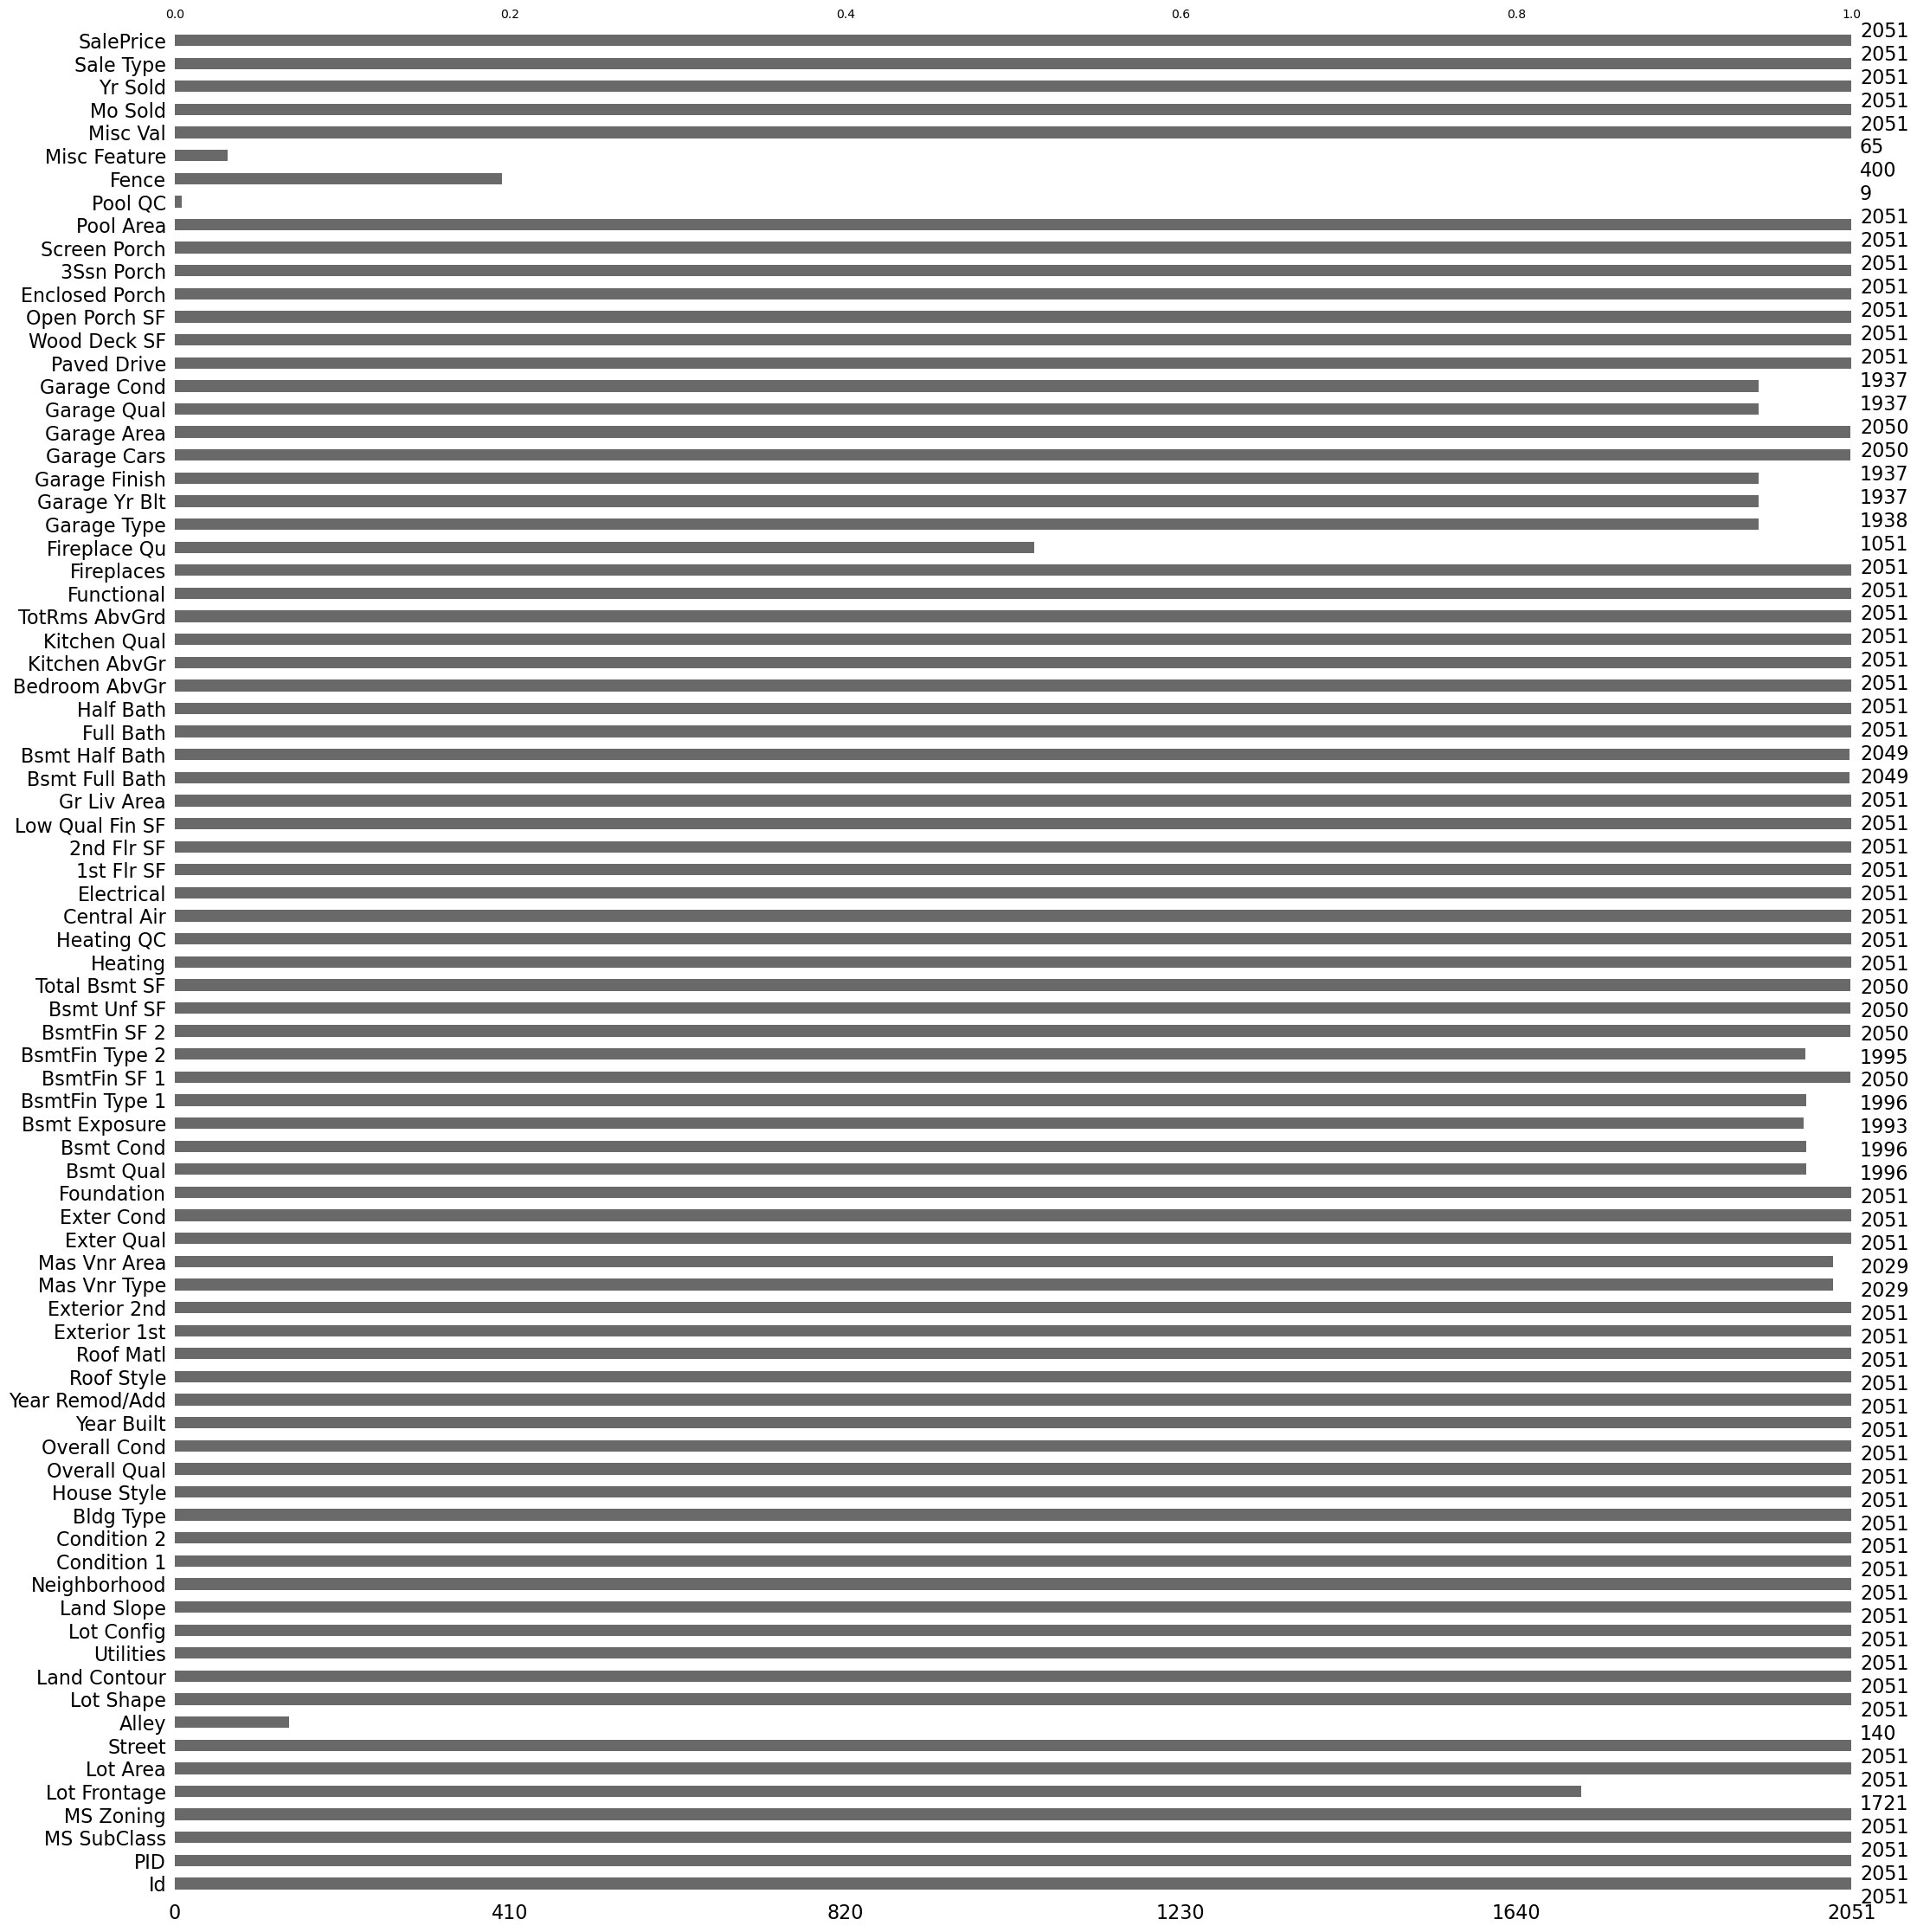

In [10]:
msno.bar(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [13]:
(df.isnull().sum()/df.isnull().count()) * 100

id                  0.000000
pid                 0.000000
ms_subclass         0.000000
ms_zoning           0.000000
lot_frontage       16.089712
lot_area            0.000000
street              0.000000
alley              93.174061
lot_shape           0.000000
land_contour        0.000000
utilities           0.000000
lot_config          0.000000
land_slope          0.000000
neighborhood        0.000000
condition_1         0.000000
condition_2         0.000000
bldg_type           0.000000
house_style         0.000000
overall_qual        0.000000
overall_cond        0.000000
year_built          0.000000
year_remod/add      0.000000
roof_style          0.000000
roof_matl           0.000000
exterior_1st        0.000000
exterior_2nd        0.000000
mas_vnr_type        1.072647
mas_vnr_area        1.072647
exter_qual          0.000000
exter_cond          0.000000
foundation          0.000000
bsmt_qual           2.681619
bsmt_cond           2.681619
bsmt_exposure       2.827889
bsmtfin_type_1

#### We have 96% missing in Misc Feature, 80% in Fence, 99% in Pool QC, 93% in Alley and 48% in Fireplace QU

In [14]:
df1 = df.drop(columns = ['misc_feature', 'fence', 'pool_qc', 'alley',
                        'fireplace_qu'])

In [15]:
df1.isnull().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       330
lot_area             0
street               0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
mas_vnr_area        22
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
heating              0
heating_qc           0
central_air          0
electrical           0
1st_flr_sf 

In [16]:
num_data = df1.select_dtypes('number')
num_data.head()

id        pid  ms_subclass  lot_frontage  lot_area  overall_qual  \
0  109  533352170           60           NaN     13517             6   
1  544  531379050           60          43.0     11492             7   
2  153  535304180           20          68.0      7922             5   
3  318  916386060           60          73.0      9802             5   
4  255  906425045           50          82.0     14235             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  ...  wood_deck_sf  \
0             8        1976            2005         289.0  ...             0   
1             5        1996            1997         132.0  ...             0   
2             7        1953            2007           0.0  ...             0   
3             5        2006            2007           0.0  ...           100   
4             8        1900            1993           0.0  ...             0   

   open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   misc_val  mo_sold  yr_sold  saleprice  
0         0        3     2010     130500  
1         0        4     2009     220000  
2         0        1     2010     109000  
3         0        4     2010     174000  
4         0        3     2010     138500  

[5 rows x 39 columns]

In [17]:
num_data.drop(columns = ['pid', 'id'], inplace = True)
num_data.head()

ms_subclass  lot_frontage  lot_area  overall_qual  overall_cond  \
0           60           NaN     13517             6             8   
1           60          43.0     11492             7             5   
2           20          68.0      7922             5             7   
3           60          73.0      9802             5             5   
4           50          82.0     14235             6             8   

   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  ...  \
0        1976            2005         289.0         533.0           0.0  ...   
1        1996            1997         132.0         637.0           0.0  ...   
2        1953            2007           0.0         731.0           0.0  ...   
3        2006            2007           0.0           0.0           0.0  ...   
4        1900            1993           0.0           0.0           0.0  ...   

   wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   pool_area  misc_val  mo_sold  yr_sold  saleprice  
0          0         0        3     2010     130500  
1          0         0        4     2009     220000  
2          0         0        1     2010     109000  
3          0         0        4     2010     174000  
4          0         0        3     2010     138500  

[5 rows x 37 columns]

In [18]:
cat_data = df1.select_dtypes('object')
cat_data.head()

ms_zoning street lot_shape land_contour utilities lot_config land_slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  neighborhood condition_1 condition_2  ... central_air electrical  \
0       Sawyer        RRAe        Norm  ...           Y      SBrkr   
1      SawyerW        Norm        Norm  ...           Y      SBrkr   
2        NAmes        Norm        Norm  ...           Y      SBrkr   
3       Timber        Norm        Norm  ...           Y      SBrkr   
4      SawyerW        Norm        Norm  ...           Y      SBrkr   

  kitchen_qual functional garage_type garage_finish garage_qual garage_cond  \
0           Gd        Typ      Attchd           RFn          TA          TA   
1           Gd        Typ      Attchd           RFn          TA          TA   
2           Gd        Typ      Detchd           Unf          TA          TA   
3           TA        Typ     BuiltIn           Fin          TA          TA   
4           TA        Typ      Detchd           Unf          TA          TA   

  paved_drive sale_type  
0           Y       WD   
1           Y       WD   
2           Y       WD   
3           Y       WD   
4           N       WD   

[5 rows x 37 columns]

In [19]:
cat_data['garage_cond'].fillna("TA", inplace = True)

In [20]:
cat_data['electrical'] = np.where(cat_data['electrical'] == "Mix",
                                 'FuseP', cat_data['electrical'])

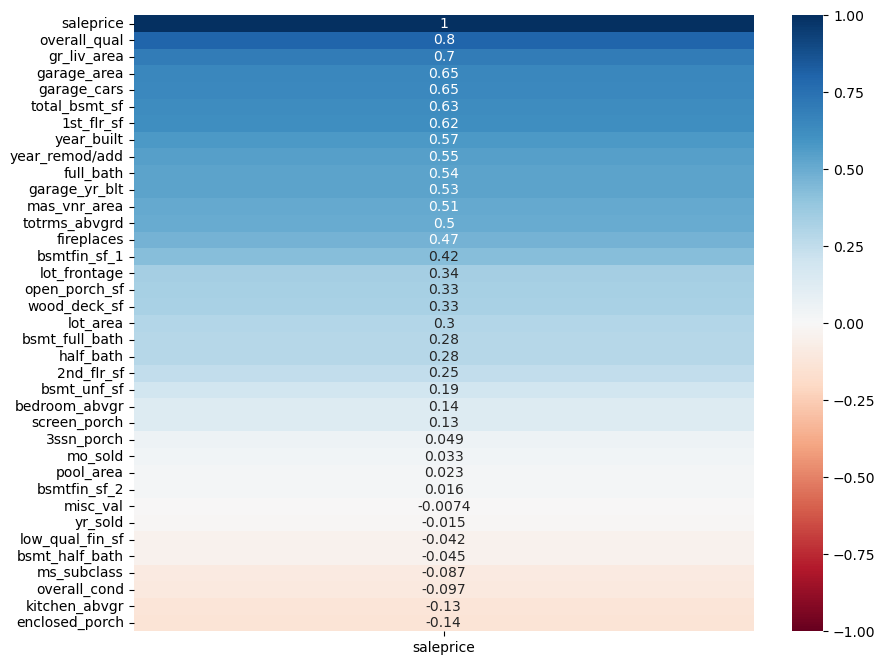

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(num_data.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), 
            annot=True,
           vmin=-1,
           vmax=1,
           cmap = 'RdBu');

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

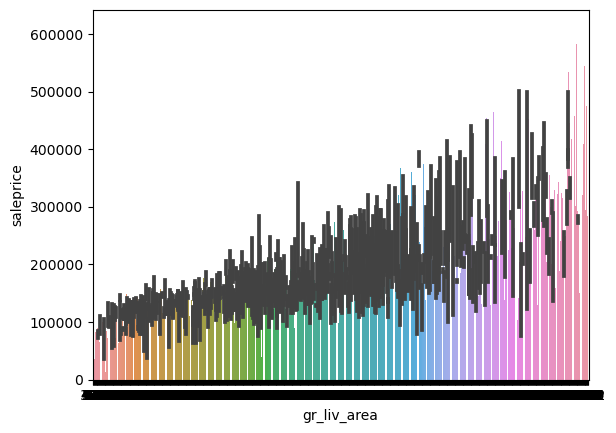

In [22]:
sns.barplot(num_data['gr_liv_area'], num_data['saleprice'])

In [23]:
pd.to_datetime(num_data['year_built']).dt.year

0       1970
1       1970
2       1970
3       1970
4       1970
5       1970
6       1970
7       1970
8       1970
9       1970
10      1970
11      1970
12      1970
13      1970
14      1970
15      1970
16      1970
17      1970
18      1970
19      1970
20      1970
21      1970
22      1970
23      1970
24      1970
25      1970
26      1970
27      1970
28      1970
29      1970
30      1970
31      1970
32      1970
33      1970
34      1970
35      1970
36      1970
37      1970
38      1970
39      1970
40      1970
41      1970
42      1970
43      1970
44      1970
45      1970
46      1970
47      1970
48      1970
49      1970
50      1970
51      1970
52      1970
53      1970
54      1970
55      1970
56      1970
57      1970
58      1970
59      1970
60      1970
61      1970
62      1970
63      1970
64      1970
65      1970
66      1970
67      1970
68      1970
69      1970
70      1970
71      1970
72      1970
73      1970
74      1970
75      1970
76      1970

In [24]:
num_data['year_built']

0       1976
1       1996
2       1953
3       2006
4       1900
5       1966
6       2005
7       1959
8       1952
9       1969
10      1971
11      2005
12      1880
13      1999
14      2007
15      2004
16      1916
17      1963
18      1977
19      2009
20      1968
21      2000
22      2005
23      1992
24      1955
25      1961
26      1965
27      1937
28      1895
29      1949
30      1981
31      1929
32      1995
33      1952
34      2007
35      1958
36      1977
37      1977
38      1973
39      1994
40      1965
41      2006
42      1978
43      1954
44      1965
45      1935
46      1941
47      1931
48      1954
49      2003
50      2000
51      1928
52      1978
53      1970
54      1951
55      1969
56      2004
57      1954
58      1953
59      1996
60      1999
61      2007
62      1977
63      1920
64      1955
65      2007
66      1930
67      2004
68      2006
69      2005
70      2009
71      1996
72      1959
73      2004
74      2005
75      1930
76      1924

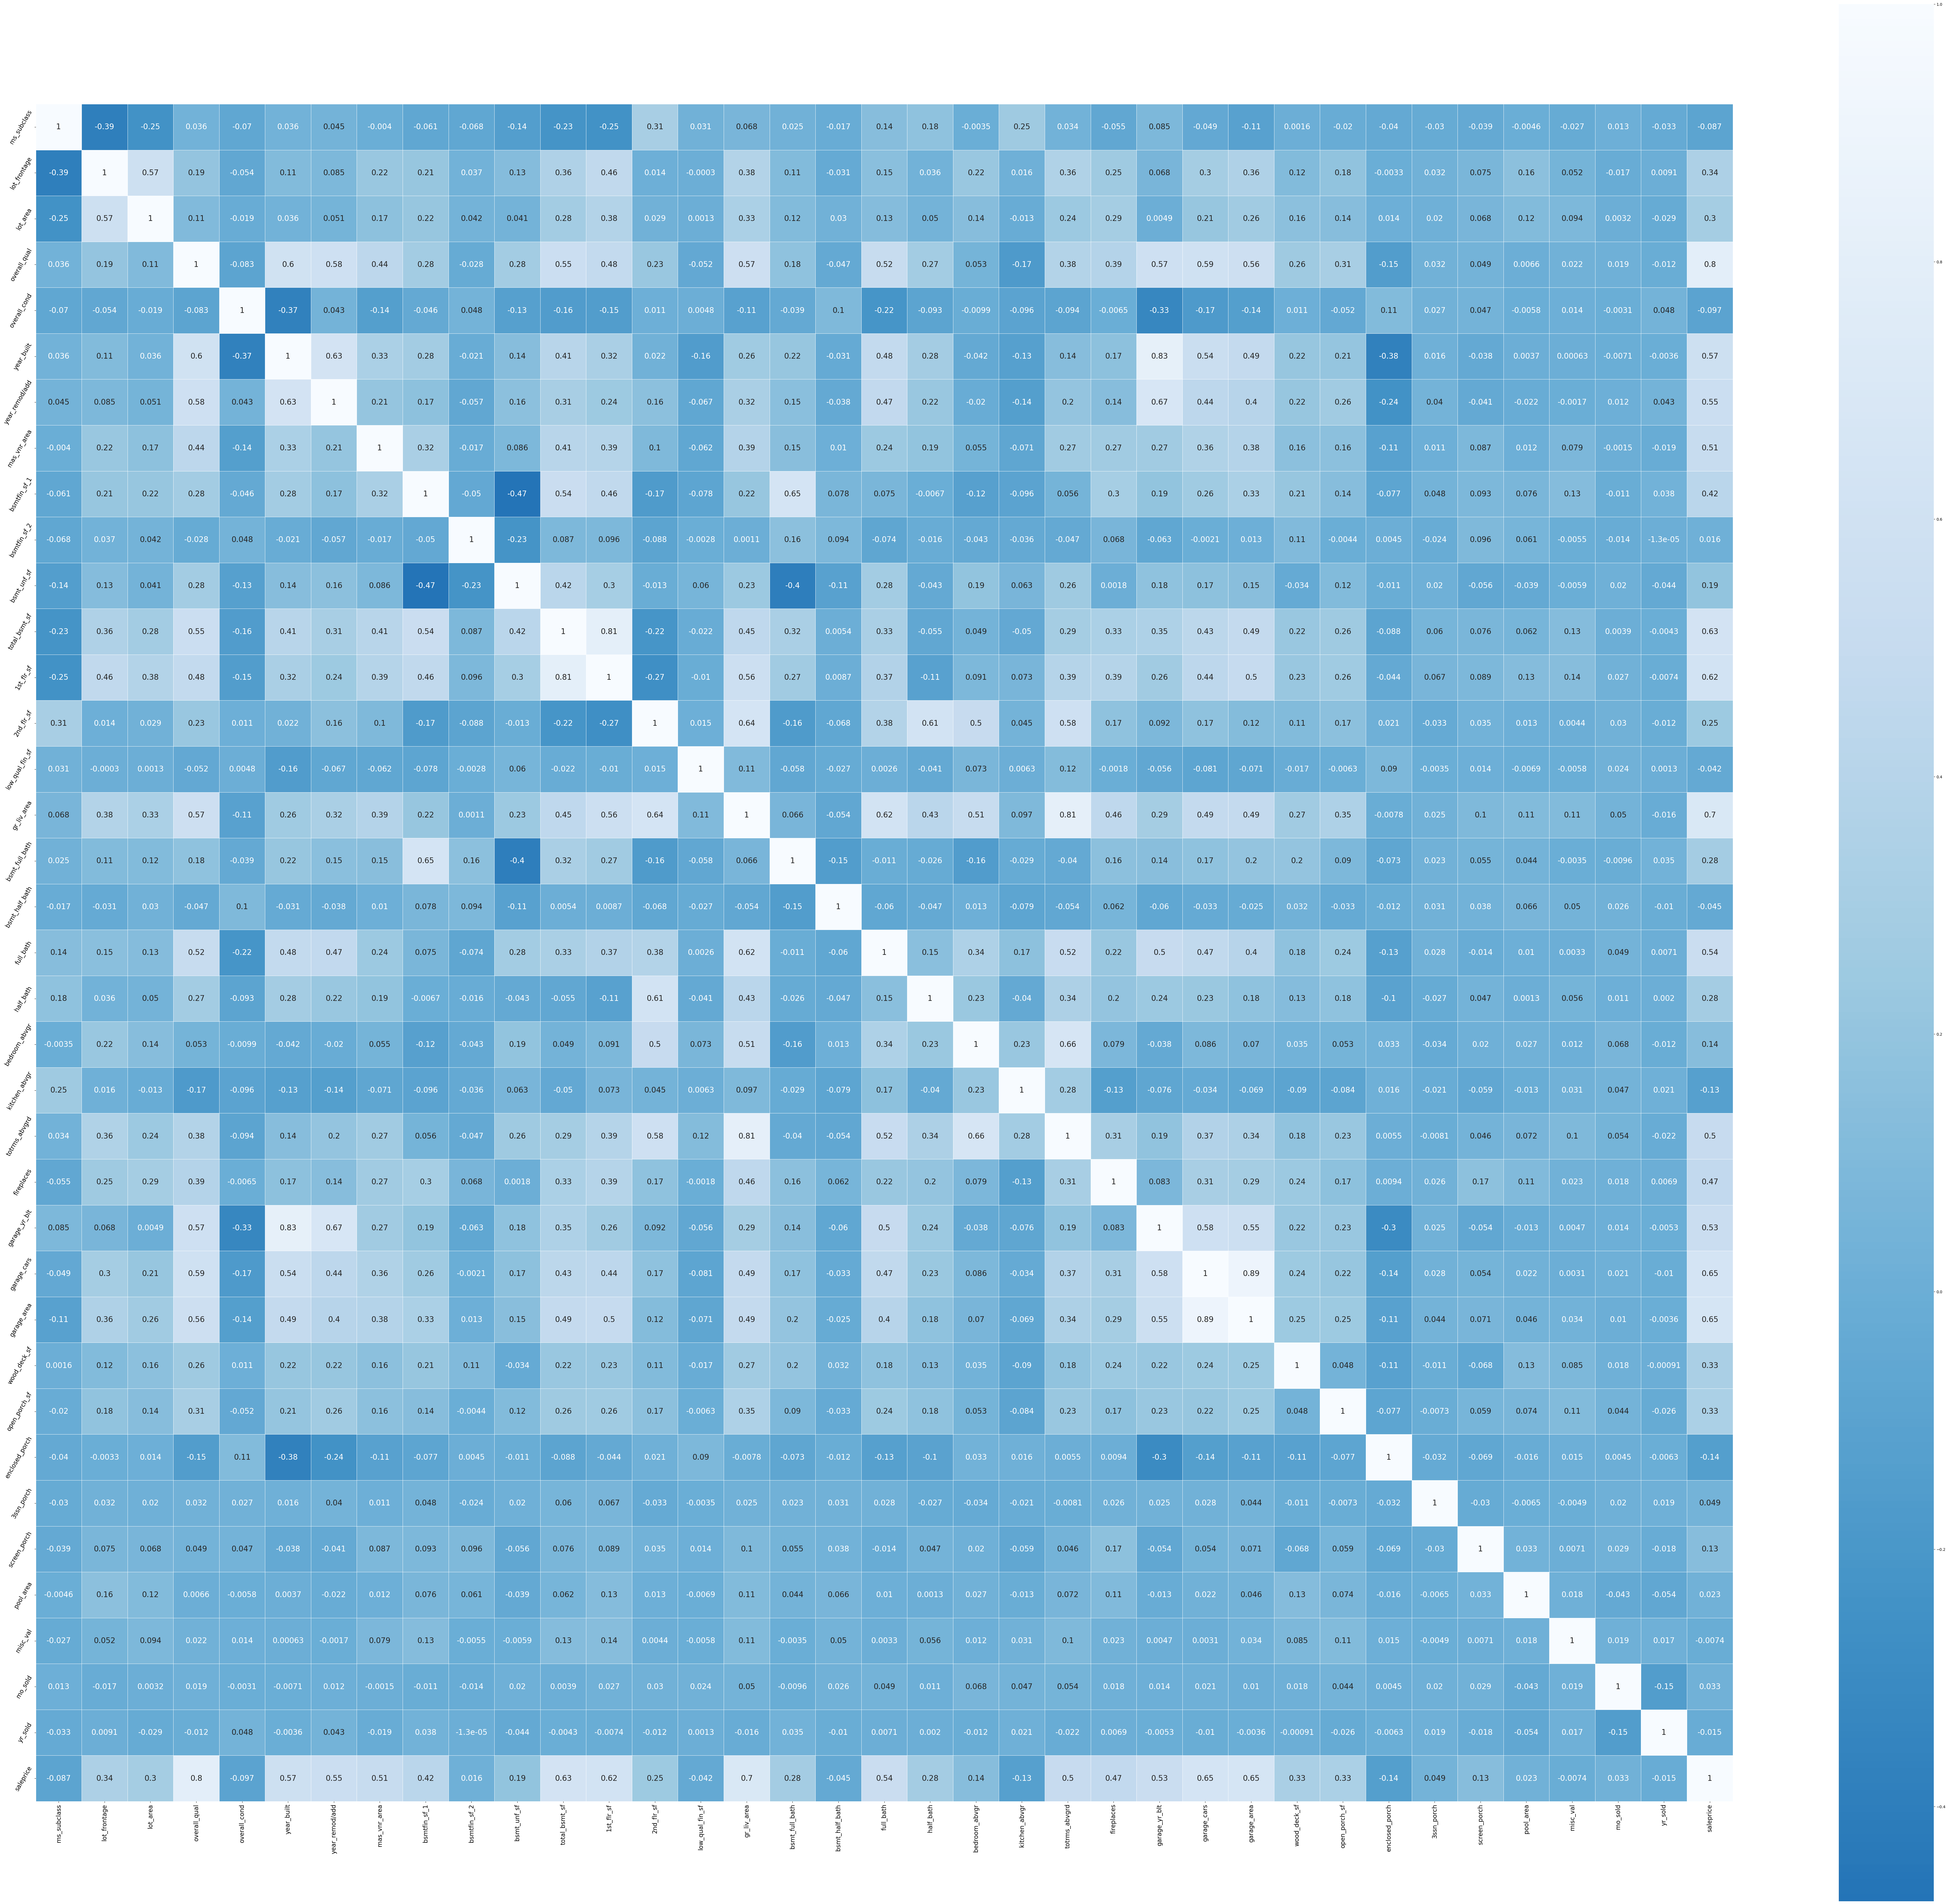

In [25]:
plt.figure(figsize = (100,90))
sns.heatmap(num_data.corr(), square = True, annot = True, linewidths = 0.5,
           cmap = plt.cm.Blues_r, center = 0, annot_kws ={'fontsize':20})
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16, rotation  = 60);

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(num_data, 0.60)
print(len(corr_features))
print(corr_features)

11
{'year_remod/add', 'gr_liv_area', 'totrms_abvgrd', 'bsmt_full_bath', 'year_built', 'full_bath', 'saleprice', 'half_bath', 'garage_area', 'garage_yr_blt', '1st_flr_sf'}


In [28]:
corr_features1 = list(corr_features)

In [29]:
features1 = num_data[['totrms_abvgrd', 'garage_area', 'overall_qual',
                    '1st_flr_sf']]

In [30]:
features2 = num_data[['totrms_abvgrd', 'garage_area', 'overall_qual',
                    '1st_flr_sf', 'half_bath', 'full_bath', 
                      'gr_liv_area', 'bsmt_full_bath']]

In [31]:
features2['bsmt_full_bath'].fillna(1, inplace = True)

In [32]:
features2['garage_area'].fillna(473, inplace = True)

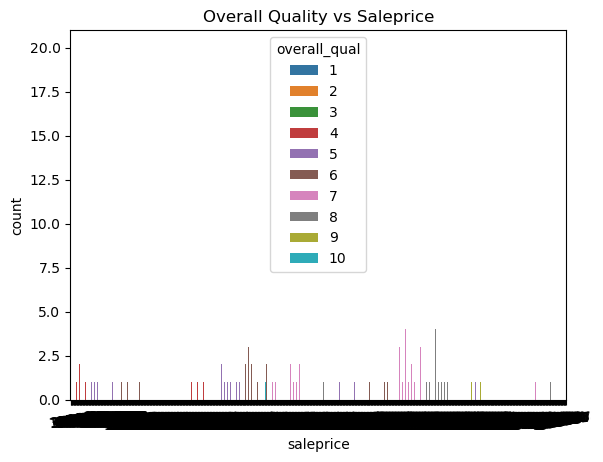

In [33]:
sns.countplot(x = 'saleprice', hue = 'overall_qual', 
              data = num_data)
plt.xticks(rotation = 10)
plt.title("Overall Quality vs Saleprice");

In [34]:
features1[features1['garage_area'].isnull()]

totrms_abvgrd  garage_area  overall_qual  1st_flr_sf
1712              6          NaN             5         942

In [35]:
features1['garage_area'].mean()

473.6717073170732

In [36]:
features1['garage_area'] =  features1['garage_area'].replace(0, 473)

In [37]:
features1['garage_area'].fillna(400, inplace = True)

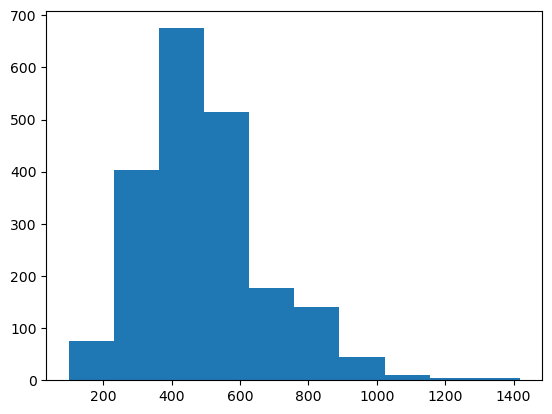

In [38]:
plt.hist(features1['garage_area']);

In [39]:
features1.isnull().sum()

totrms_abvgrd    0
garage_area      0
overall_qual     0
1st_flr_sf       0
dtype: int64

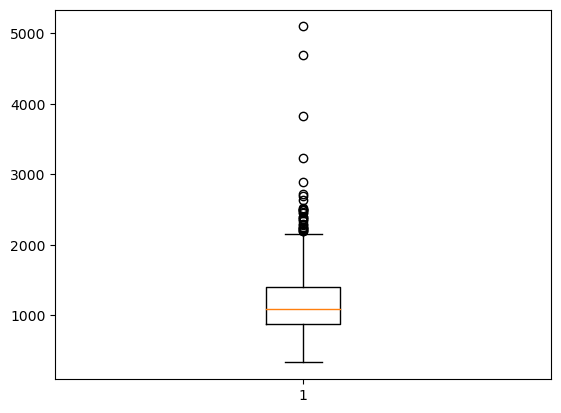

In [40]:
plt.boxplot(features1['1st_flr_sf']);

In [41]:
num_data['totrms_abvgrd'].corr(num_data['garage_yr_blt'])

0.18683065769095383

In [42]:
num_data['overall_qual'].corr(num_data['gr_liv_area'])

0.5667005783734144

In [43]:
num_data['garage_area'].corr(num_data['gr_liv_area'])

0.4909491185996647

In [44]:
num_data.corr()[['saleprice']].sort_values(by='saleprice', 
                                           ascending = False)

saleprice
saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
garage_yr_blt     0.533922
mas_vnr_area      0.512230
totrms_abvgrd     0.504014
fireplaces        0.471093
bsmtfin_sf_1      0.423519
lot_frontage      0.341842
open_porch_sf     0.333476
wood_deck_sf      0.326490
lot_area          0.296566
bsmt_full_bath    0.283662
half_bath         0.283001
2nd_flr_sf        0.248452
bsmt_unf_sf       0.190210
bedroom_abvgr     0.137067
screen_porch      0.134581
3ssn_porch        0.048732
mo_sold           0.032735
pool_area         0.023106
bsmtfin_sf_2      0.016255
misc_val         -0.007375
yr_sold          -0.015203
low_qual_fin_sf  -0.041594
bsmt_half_bath   -0.045328
ms_subclass      -0.087335
overall_cond     -0.097019
kitchen_abvgr    -0.125444
enclosed_porch   -0.135656

### Checking for outliers

In [45]:
col_list = list(num_data.columns)
print(type(col_list))
print(len(col_list))

<class 'list'>
37


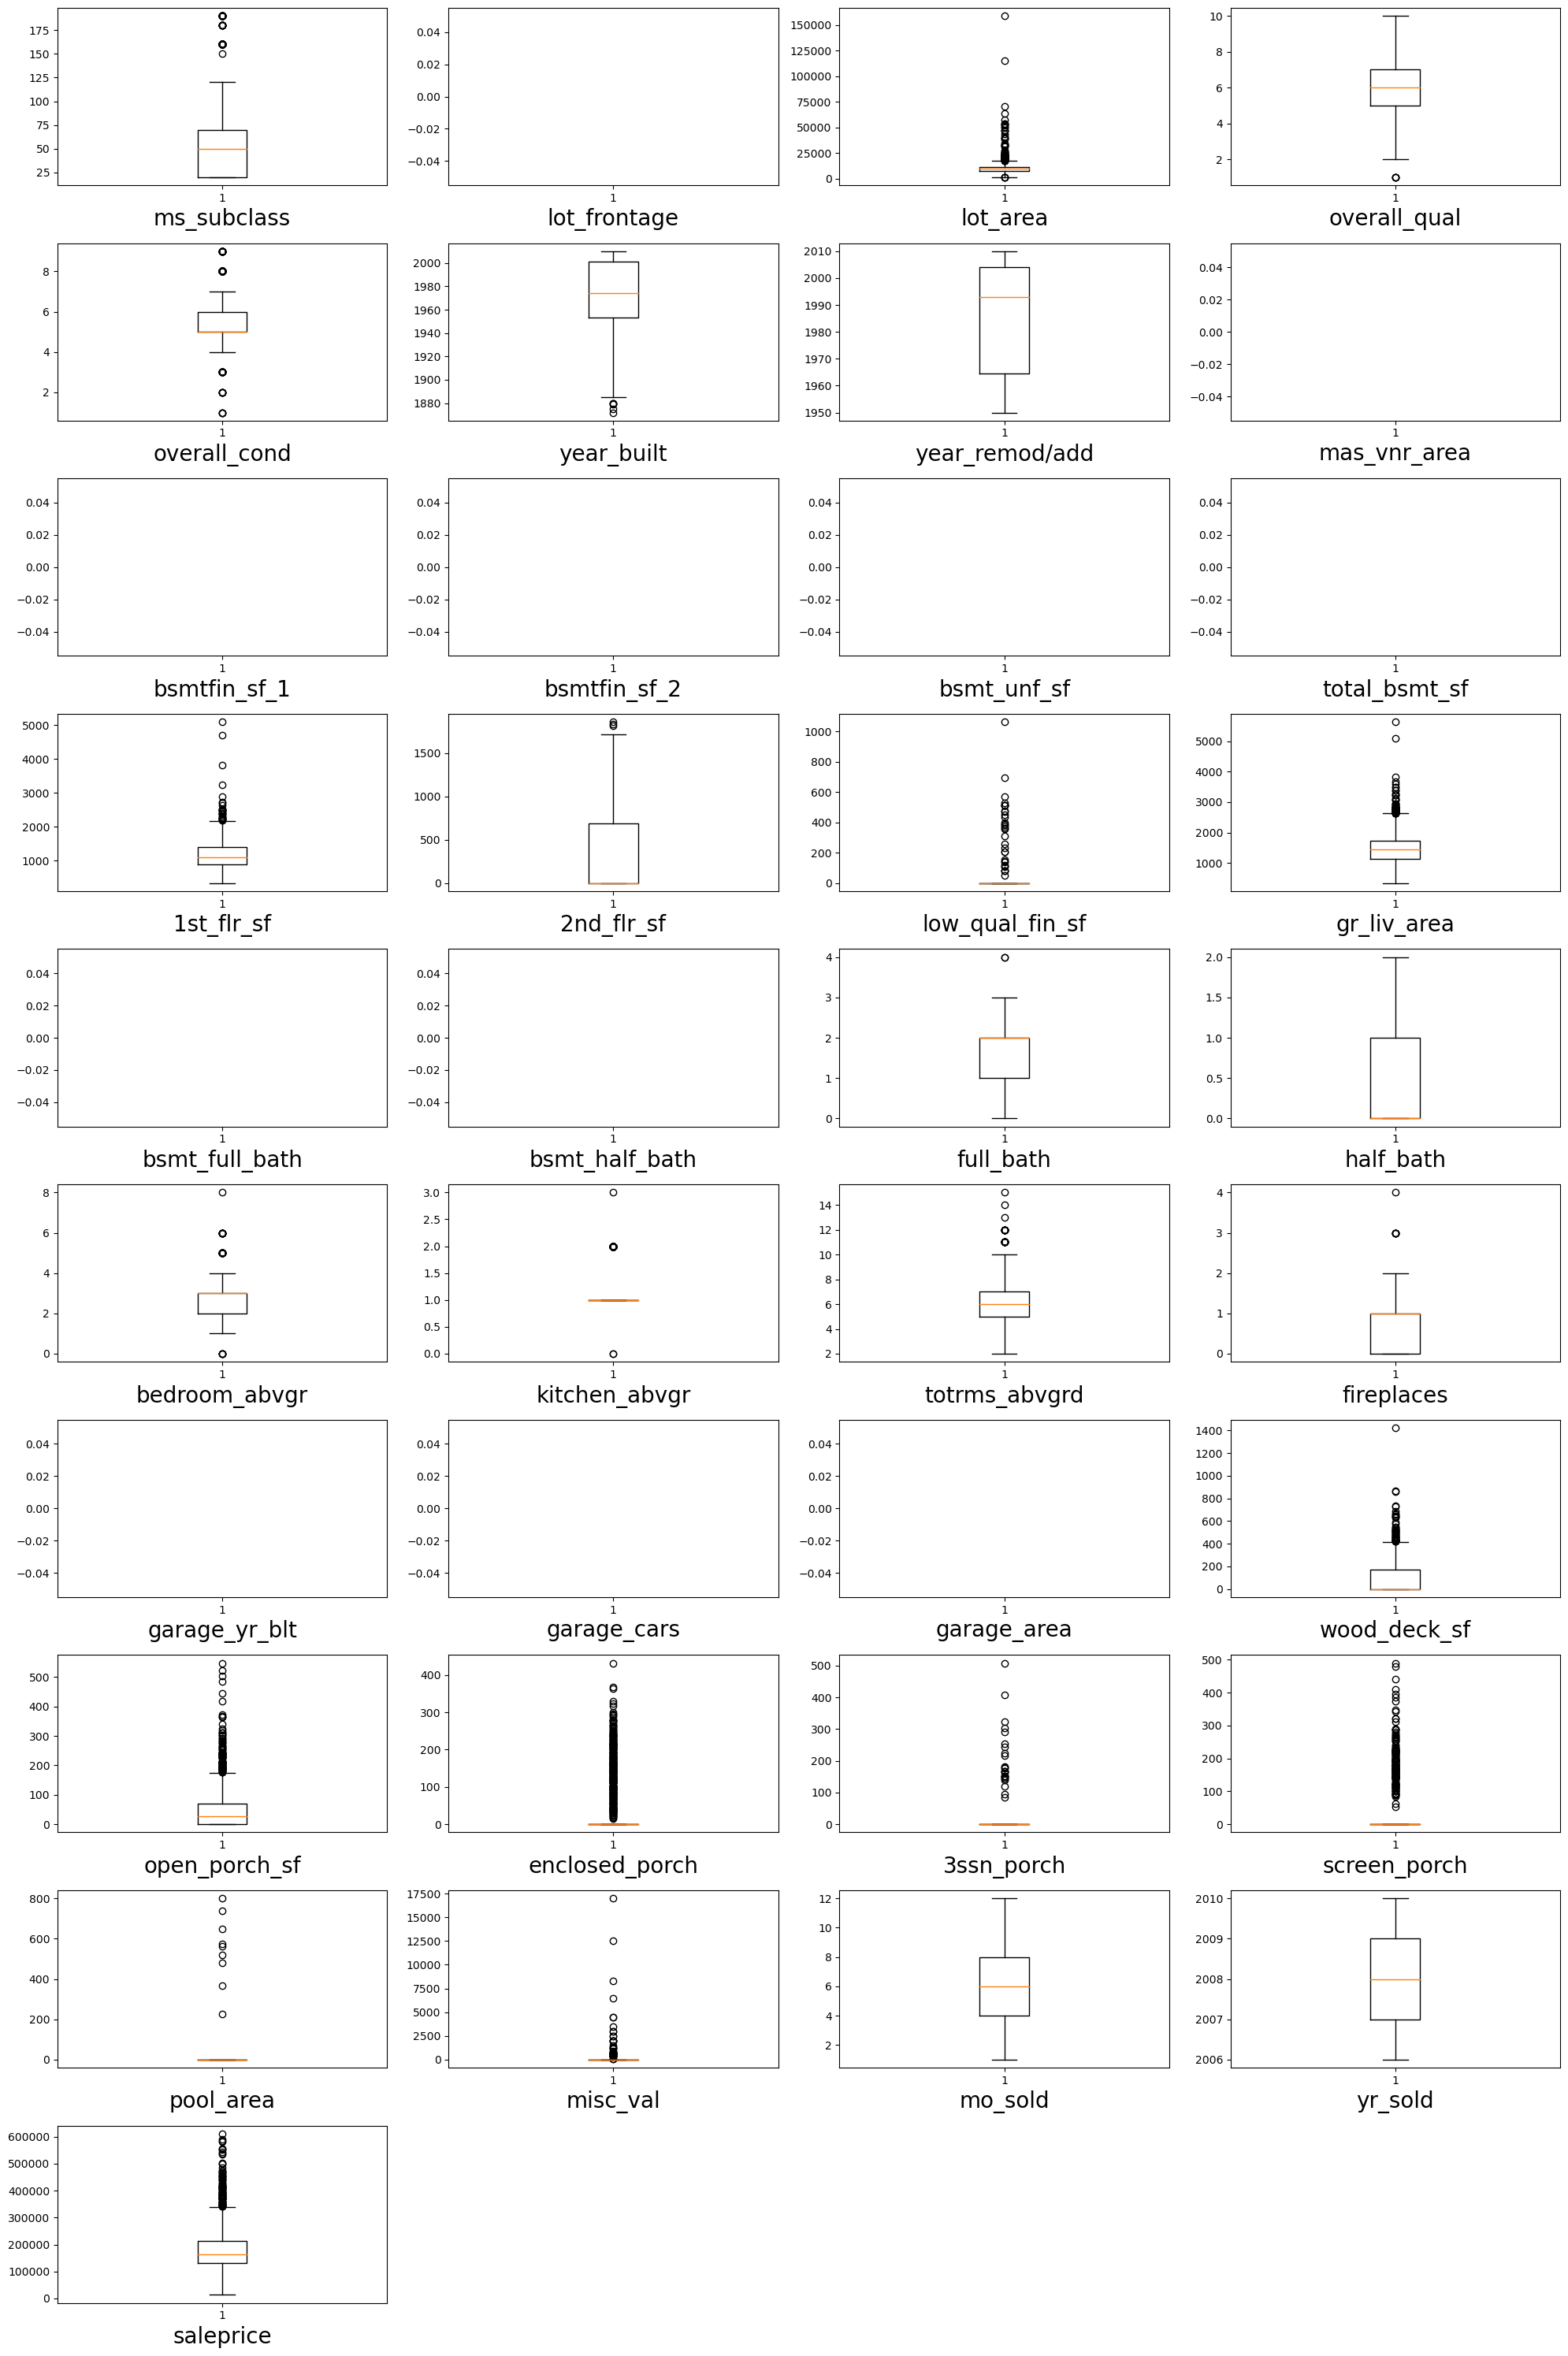

In [46]:
plt.figure(figsize = (20,30))
for index, col in enumerate(col_list):
    plt.subplot(10,4, index+1)
    plt.boxplot(num_data[col])
    plt.xlabel(col, fontsize = 20)
plt.tight_layout()

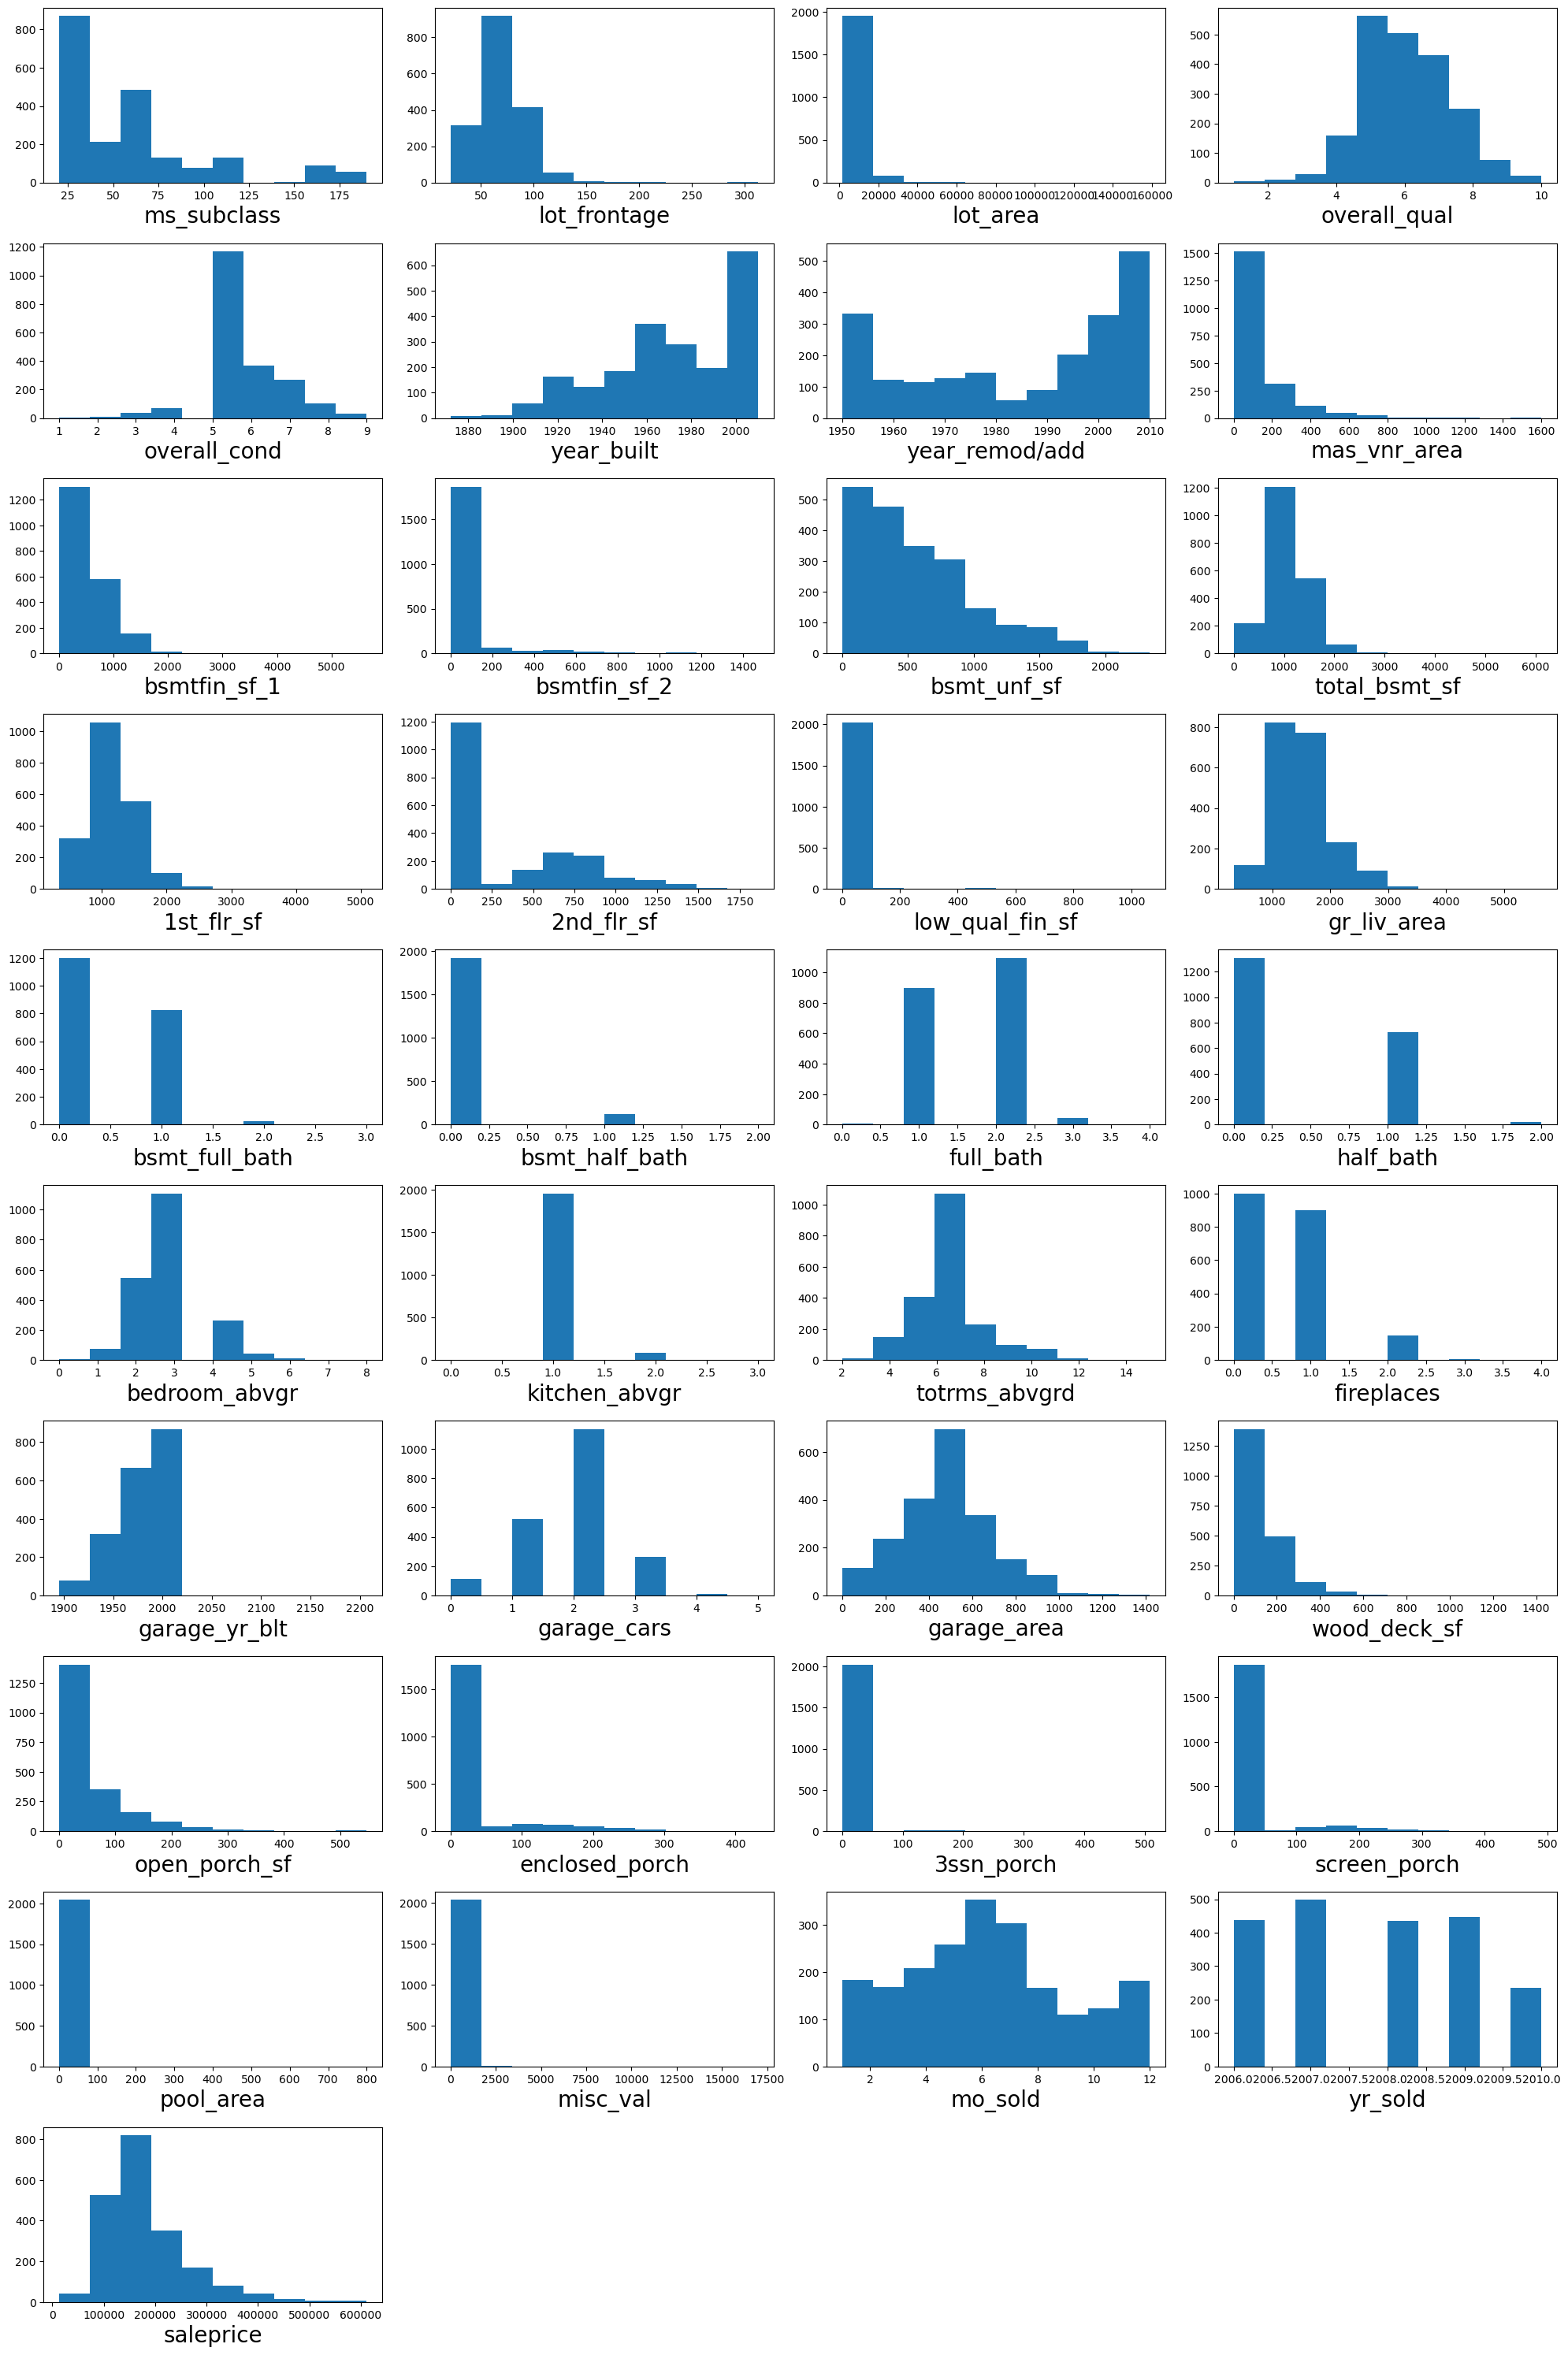

In [47]:
plt.figure(figsize = (20,30))
for index, col in enumerate(col_list):
    plt.subplot(10,4, index+1)
    plt.hist(num_data[col])
    plt.xlabel(col, fontsize = 20)
plt.tight_layout()

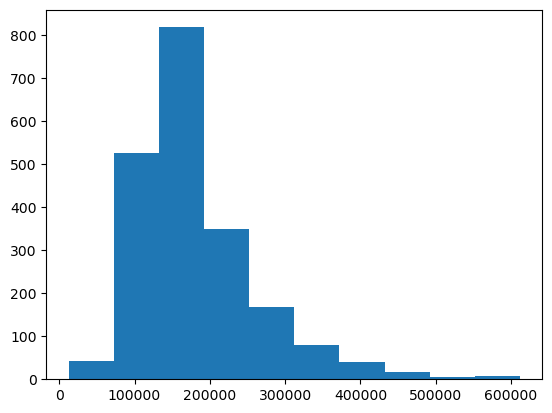

In [48]:
plt.hist(num_data['saleprice']);

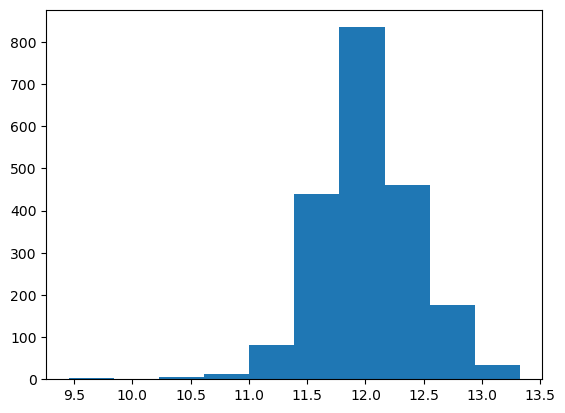

In [49]:
plt.hist(np.log(num_data['saleprice']));

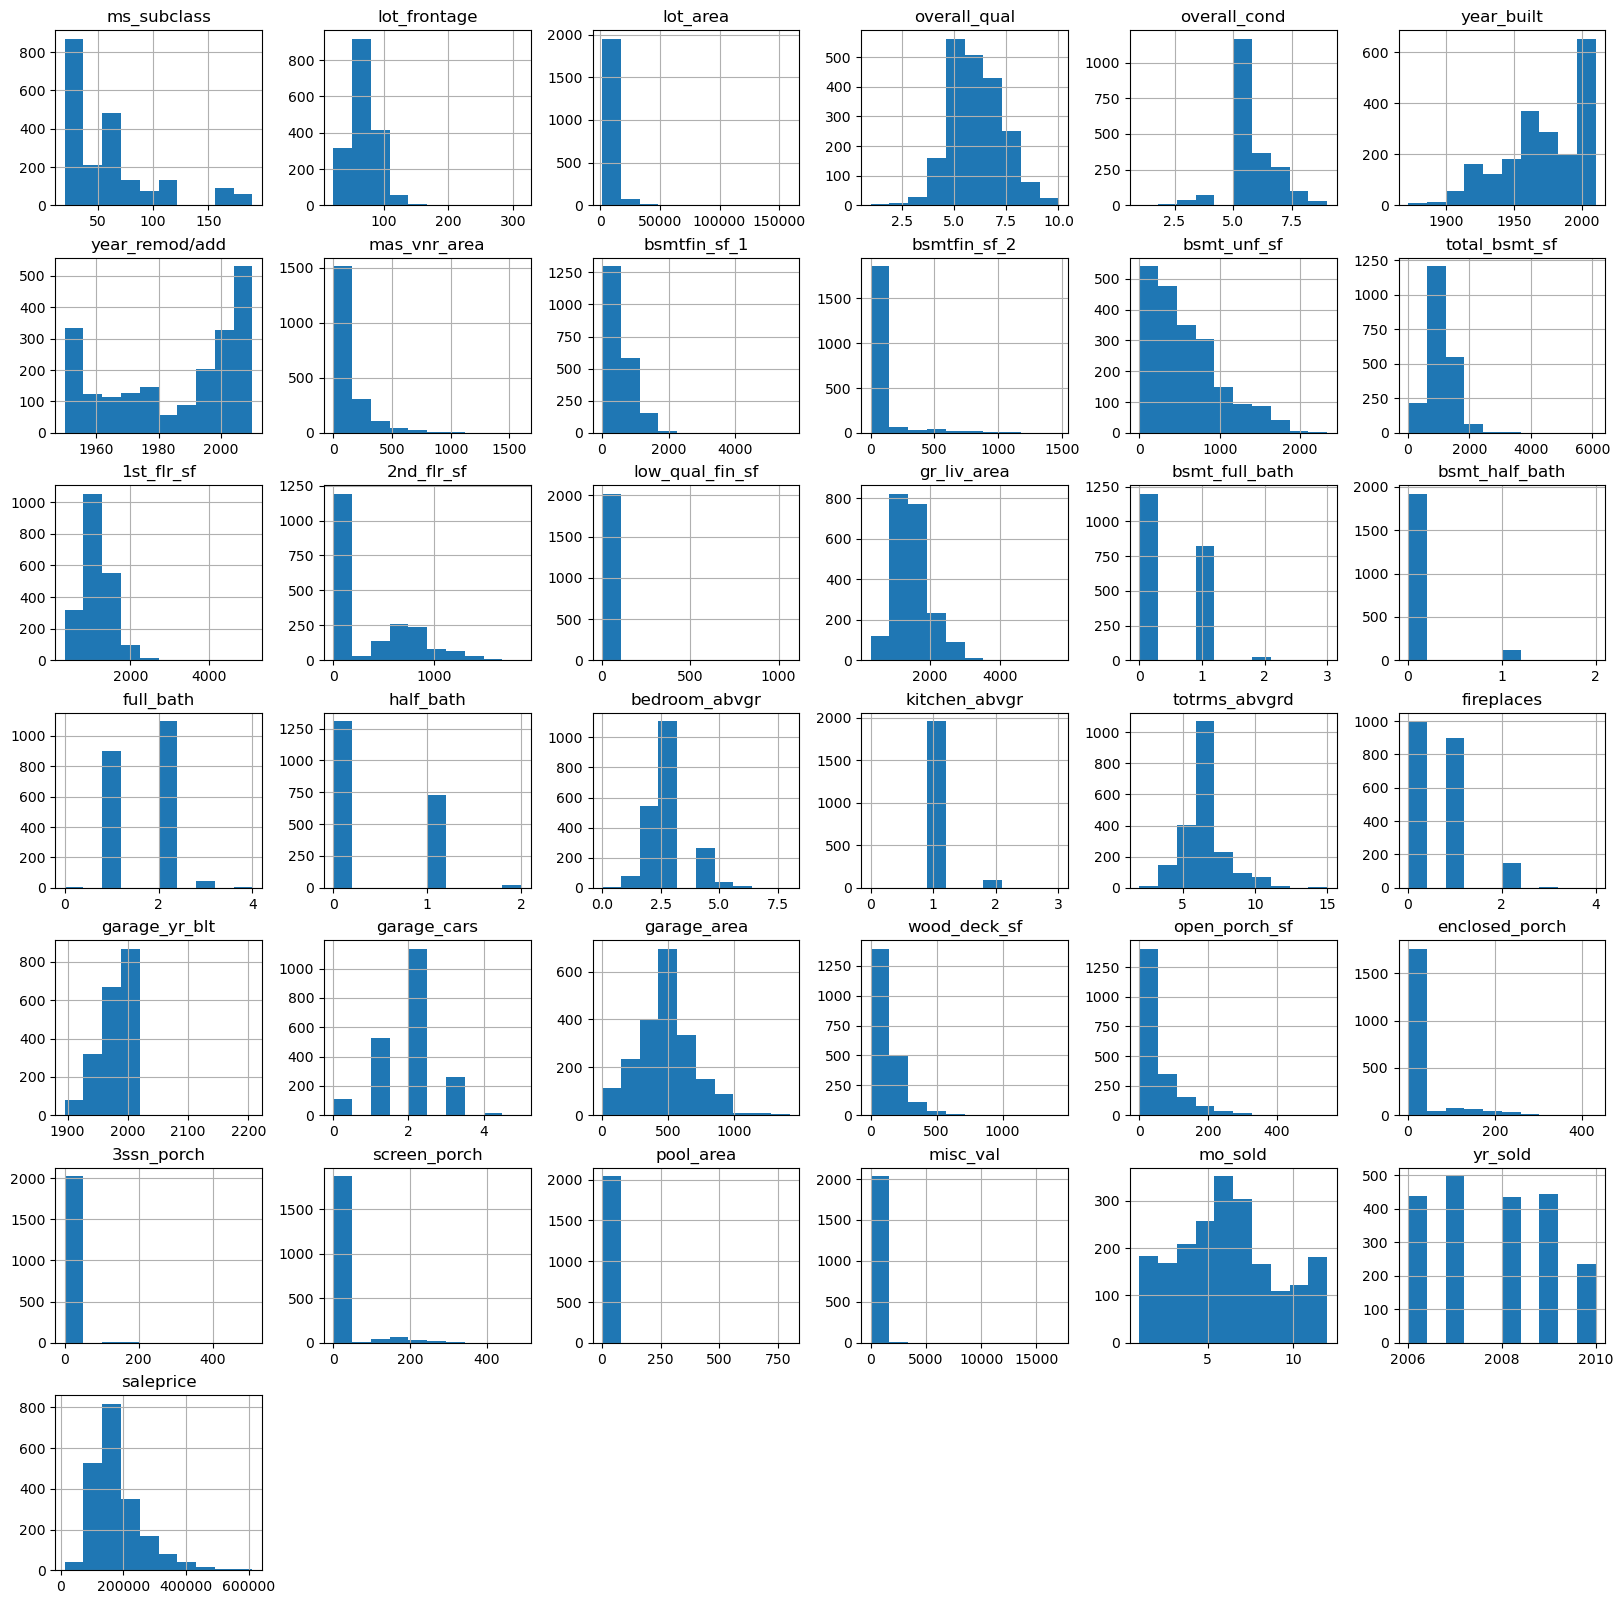

In [50]:
num_data.hist(figsize = (20,20));

In [51]:
log_saleprice = np.log(num_data['saleprice'])

In [52]:
sqrt_saleprice = np.sqrt(num_data['saleprice'])

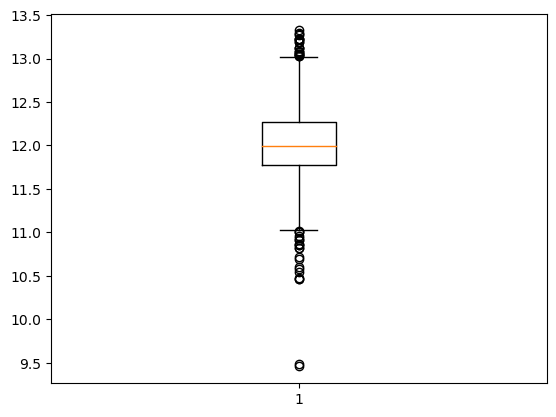

In [53]:
plt.boxplot(log_saleprice);

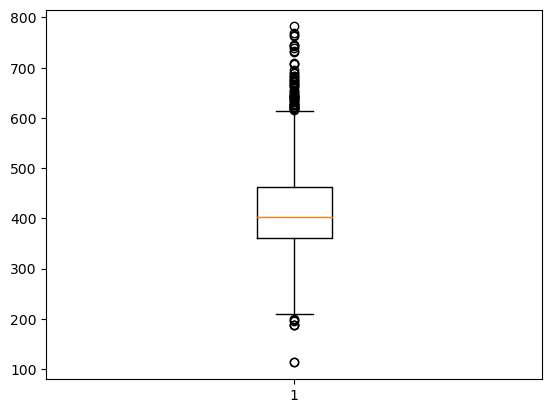

In [54]:
plt.boxplot(sqrt_saleprice);

In [55]:
num_data['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [56]:
X = features1
y = num_data['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size = 0.6,
                                                   random_state =42)

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7371361139859803
0.7848352749511027


In [58]:
X.columns

Index(['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf'], dtype='object')

In [59]:
preds = lr.predict(df_test[['overall_qual', 'totrms_abvgrd', 
                           'garage_area', '1st_flr_sf']])
df_test['saleprice'] = preds
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('new_submission.csv') 

In [60]:
new_submission.head()

saleprice
id                
2658  1.354941e+07
2718  1.790799e+07
2414  1.311538e+07
1989  1.478056e+07
625   1.585438e+07

In [61]:
X = features2
y = num_data['saleprice']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   train_size = 0.7,
                                                   random_state = 42)

In [63]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
print(lr1.score(X_train, y_train))
print(lr1.score(X_test, y_test))

0.7705041801272914
0.824309677605124


In [64]:
features2.columns

Index(['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf',
       'half_bath', 'full_bath', 'gr_liv_area', 'bsmt_full_bath'],
      dtype='object')

In [65]:
preds = lr1.predict(df_test[['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf',
       'half_bath', 'full_bath', 'gr_liv_area', 'bsmt_full_bath']])

In [66]:
df_test["SalePrice"] = preds

In [67]:
new_sub = df_test[['id', 'saleprice']]

In [68]:
new_sub.set_index('id', inplace=True) 

In [69]:
new_sub.to_csv('new_sub.csv') 

In [70]:
lr1.score(X,y)

0.7859364757436884

In [71]:
cat_data.head()

ms_zoning street lot_shape land_contour utilities lot_config land_slope  \
0        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
1        RL   Pave       IR1          Lvl    AllPub    CulDSac        Gtl   
2        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   

  neighborhood condition_1 condition_2  ... central_air electrical  \
0       Sawyer        RRAe        Norm  ...           Y      SBrkr   
1      SawyerW        Norm        Norm  ...           Y      SBrkr   
2        NAmes        Norm        Norm  ...           Y      SBrkr   
3       Timber        Norm        Norm  ...           Y      SBrkr   
4      SawyerW        Norm        Norm  ...           Y      SBrkr   

  kitchen_qual functional garage_type garage_finish garage_qual garage_cond  \
0           Gd        Typ      Attchd           RFn          TA          TA   
1           Gd        Typ      Attchd           RFn          TA          TA   
2           Gd        Typ      Detchd           Unf          TA          TA   
3           TA        Typ     BuiltIn           Fin          TA          TA   
4           TA        Typ      Detchd           Unf          TA          TA   

  paved_drive sale_type  
0           Y       WD   
1           Y       WD   
2           Y       WD   
3           Y       WD   
4           N       WD   

[5 rows x 37 columns]

In [72]:
cat_data['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [73]:
cat_data['street'].value_counts()

Pave    2044
Grvl       7
Name: street, dtype: int64

In [74]:
cat_data['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [75]:
cat_data.isnull().sum()

ms_zoning           0
street              0
lot_shape           0
land_contour        0
utilities           0
lot_config          0
land_slope          0
neighborhood        0
condition_1         0
condition_2         0
bldg_type           0
house_style         0
roof_style          0
roof_matl           0
exterior_1st        0
exterior_2nd        0
mas_vnr_type       22
exter_qual          0
exter_cond          0
foundation          0
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_type_2     56
heating             0
heating_qc          0
central_air         0
electrical          0
kitchen_qual        0
functional          0
garage_type       113
garage_finish     114
garage_qual       114
garage_cond         0
paved_drive         0
sale_type           0
dtype: int64

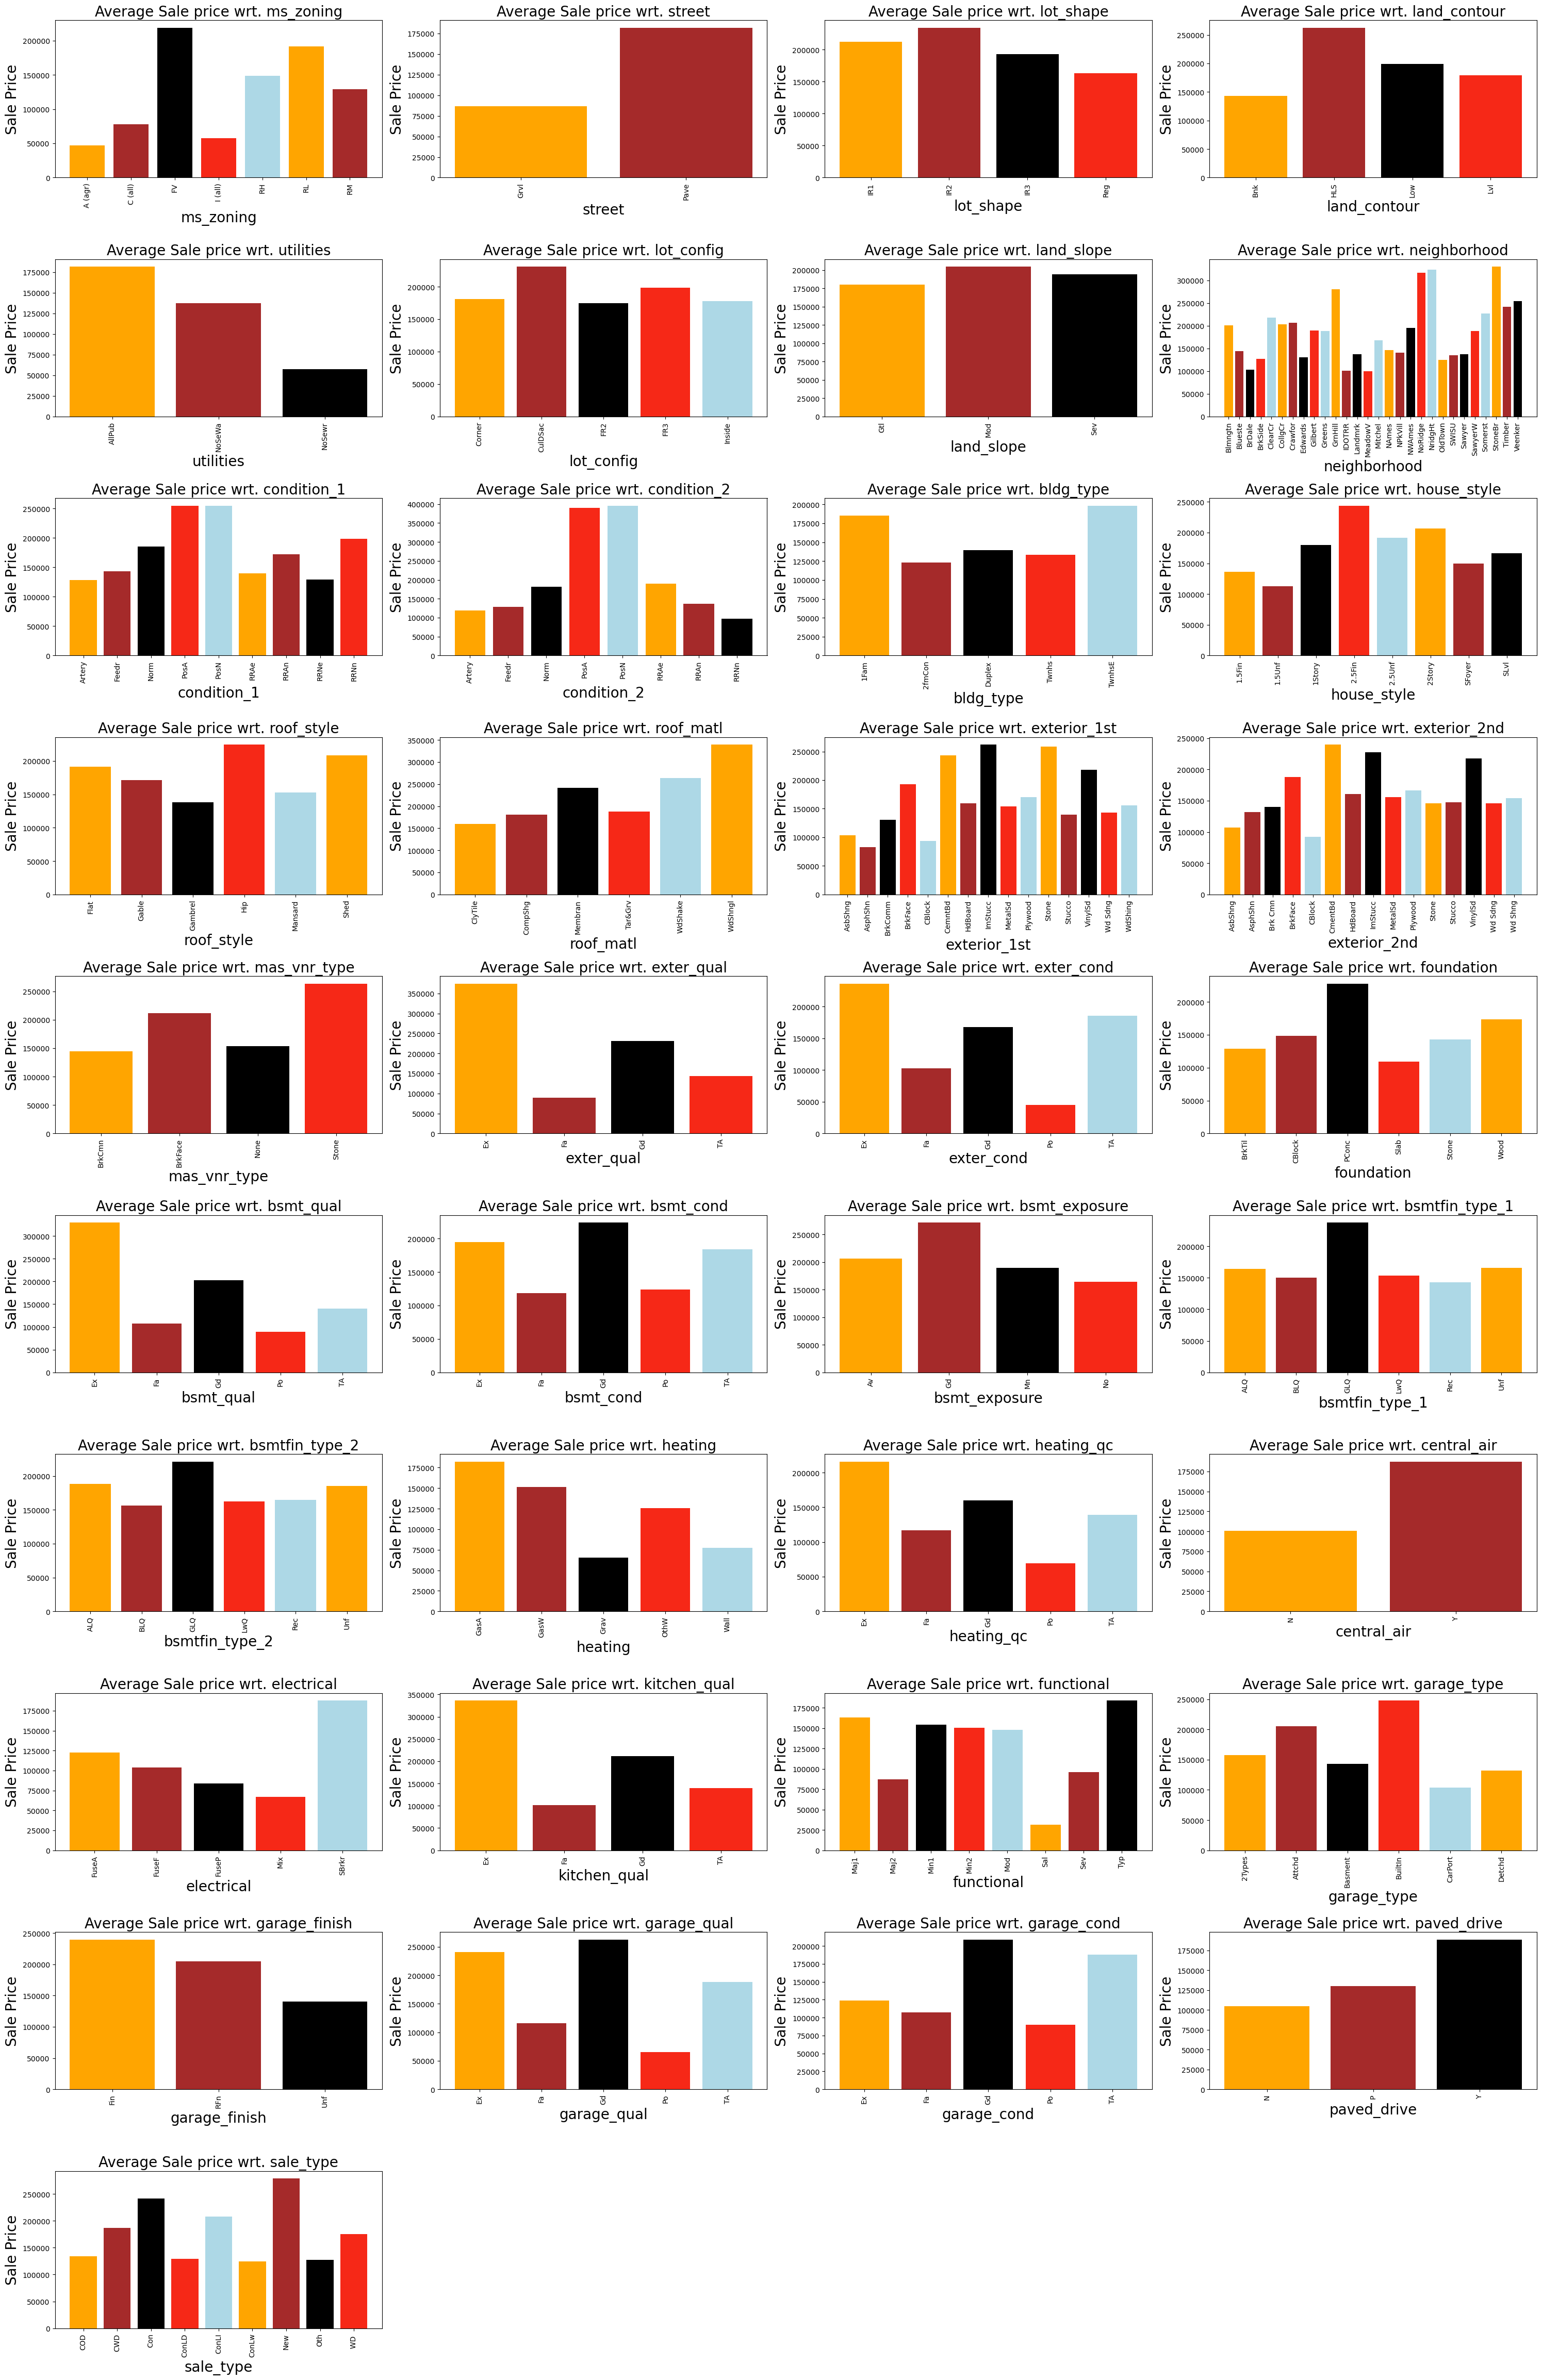

In [76]:
plt.figure(figsize = (30,50))

for index, column in enumerate(cat_data.columns):
    plt.subplot(11, 4, index+1)
    plt.bar(df1.groupby(column)['saleprice'].mean().index, df1.groupby(column)['saleprice'].mean(),
           color = ('orange', 'brown', 'black', '#F62817', 'lightblue'))
    plt.title("Average Sale price wrt. {}".format(column), fontsize = 20)
    plt.ylabel("Sale Price", fontsize = 20)
    plt.xlabel(column, fontsize = 20)
    plt.xticks(rotation = "vertical")
plt.tight_layout()

In [77]:
cat_data['central_air'].value_counts()

Y    1910
N     141
Name: central_air, dtype: int64

In [78]:
cat_data['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [79]:
cat_features1 = pd.get_dummies(cat_data['paved_drive'], 
                               cat_data['street'], 
                               cat_data['central_air'], 
                               drop_first = True)

In [80]:
cat_features1.columns

Index(['0       Pave\n1       Pave\n2       Pave\n3       Pave\n4       Pave\n5       Pave\n6       Pave\n7       Pave\n8       Pave\n9       Pave\n10      Pave\n11      Pave\n12      Pave\n13      Pave\n14      Pave\n15      Pave\n16      Pave\n17      Pave\n18      Pave\n19      Pave\n20      Pave\n21      Pave\n22      Pave\n23      Pave\n24      Pave\n25      Pave\n26      Pave\n27      Pave\n28      Pave\n29      Pave\n30      Pave\n31      Pave\n32      Pave\n33      Pave\n34      Pave\n35      Pave\n36      Pave\n37      Pave\n38      Pave\n39      Pave\n40      Pave\n41      Pave\n42      Pave\n43      Pave\n44      Pave\n45      Pave\n46      Pave\n47      Pave\n48      Pave\n49      Pave\n50      Pave\n51      Pave\n52      Pave\n53      Pave\n54      Pave\n55      Pave\n56      Pave\n57      Pave\n58      Pave\n59      Pave\n60      Pave\n61      Pave\n62      Pave\n63      Pave\n64      Pave\n65      Pave\n66      Pave\n67      Pave\n68      Pave\n69      Pave\n70      Pave

In [81]:
cat_data['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [82]:
cat_data['paved_drive'].isnull().sum()

0

In [83]:
cat_data['street'].isnull().sum()

0

In [84]:
cat_data['central_air'].isnull().sum()

0

In [85]:
cat_num_f1 = pd.concat([features1, cat_features1], axis = 1)

In [86]:
cat_num_f1.shape

(2051, 6)

In [87]:
X = cat_num_f1
y= df1['saleprice']

In [88]:
print(X.shape)
print(y.shape)

(2051, 6)
(2051,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.3,
                                                   random_state = 42)

In [90]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
print(lr2.score(X_train, y_train))
print(lr2.score(X_test, y_test))

0.7461549359871407
0.7871807136372602


In [91]:
X = cat_num_f1
y = log_saleprice

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.4,
                                                   random_state = 42)

In [93]:
loglr = LinearRegression()
loglr.fit(X_train, y_train)
print(loglr.score(X_train, y_train))
print(loglr.score(X_test, y_test))

0.7755964570994023
0.787663875835281


In [94]:
X = features1
y = log_saleprice

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.4,
                                                   random_state = 42)

In [96]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
print(lr3.score(X_train, y_train))
print(lr3.score(X_test, y_test))

0.752907692537697
0.7719001521602387


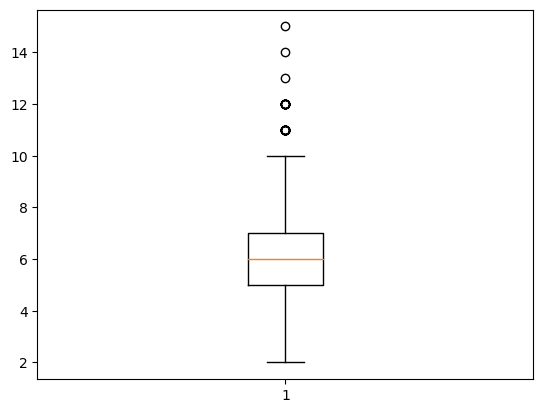

In [97]:
plt.boxplot(num_data['totrms_abvgrd']);

In [98]:
num_data['totrms_abvgrd'].mean()

6.43588493417845

In [99]:
features1[features1['garage_area'] >= 600]

totrms_abvgrd  garage_area  overall_qual  1st_flr_sf
11                6        632.0             7        1208
14                6        610.0             7        1361
15                7        624.0             5        1430
19                7        614.0             7         764
34                7        826.0             8        1718
41                7        850.0            10        2076
42                4        602.0             5        1110
45                9        786.0             8         983
46                6        660.0             5         984
60                9        671.0             8        1164
62                4        690.0             7        1483
68                7        843.0             9        1802
71                7        786.0             7        2032
74                7        834.0             7        1616
81                9       1166.0             9        2234
82                7        720.0             5         876
91                7        608.0             7        1212
99                9        725.0             8        1358
100               7        670.0             9        1884
118               7        626.0             5        1721
125               9        864.0             9        1599
131               7        720.0             5         676
137               6        627.0             8        1554
138              10        758.0            10        1528
144               6        852.0             8        1418
146               7        672.0             7         495
150               5        656.0             5        1120
151              11        716.0             9        1992
153               8        610.0             7         950
161               7        619.0             7         946
172               4        676.0             7        1218
178               9        983.0             7        1325
181               6        923.0             6        1236
187               6        754.0             8        1464
189              10        666.0             8        1264
190              11        670.0             9        1414
192               5        714.0             6        1567
194              12        968.0             5        1338
195               6        754.0             8        1590
196               6        788.0             7        1450
199               8        968.0            10        2392
201              10        812.0            10        1026
202               8        600.0             7        1108
205               5        624.0             5         548
206              10        864.0             6        1370
222               9        618.0             8        2079
227              11        656.0             9        1134
229               9        658.0             6        1497
230               7       1052.0             9        1702
231               5        600.0             6        1509
232               7        642.0             7         961
250               9        751.0             8        1251
253               6        670.0             8        1601
268               7        650.0             7        1057
270               9        795.0             8        1804
273               5        720.0             5         864
281               6        944.0             9        1800
286               9        780.0             9        2036
287               5        672.0             5        1595
289               8        784.0             7        1344
290               8        928.0             5        1652
307               6        649.0             6         900
310               6        715.0             8        1786
317              11        675.0             9        1102
318               7        702.0             9        1800
319               9        783.0             7        1108
320               7        660.0             5       

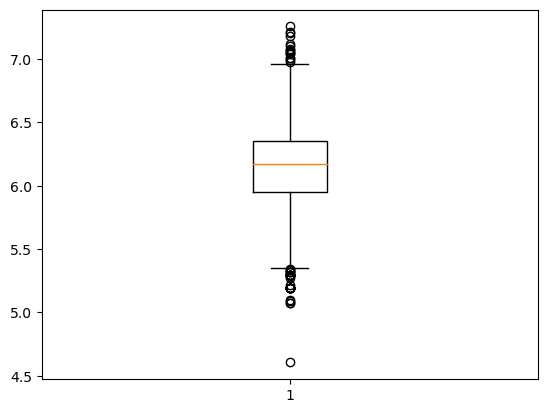

In [100]:
plt.boxplot(np.log(features1['garage_area']));

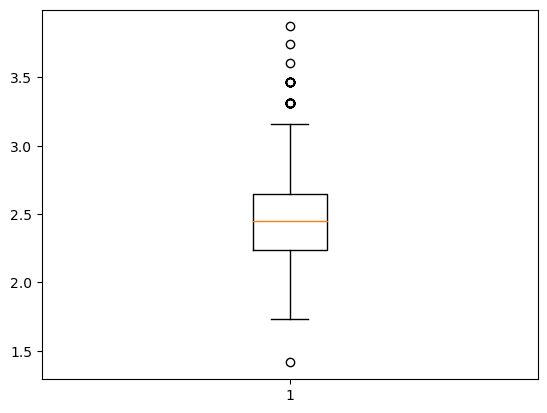

In [101]:
plt.boxplot(np.sqrt(features1['totrms_abvgrd']));

In [102]:
features1['garage_area'] = features1['garage_area'].replace(0, 474)

In [103]:
log_garage_area = np.log(features1['garage_area'])

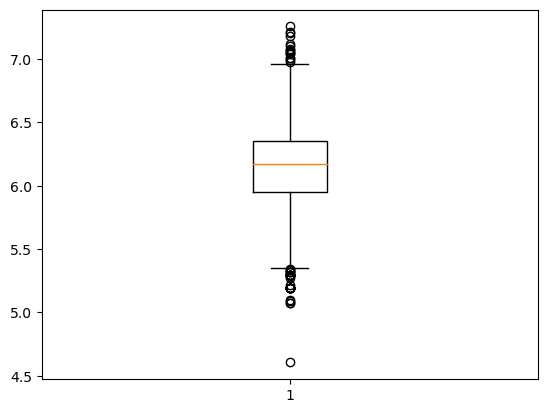

In [104]:
plt.boxplot(log_garage_area);

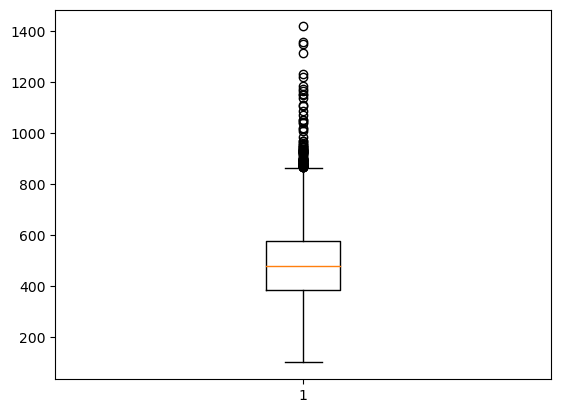

In [105]:
plt.boxplot(features1['garage_area']);

In [106]:
features1['garage_area'] = np.where(num_data['garage_area'] >= 1000, 1000, 
         num_data['garage_area'])

In [107]:
np.mean(features1['garage_area'])

471.9858536585366

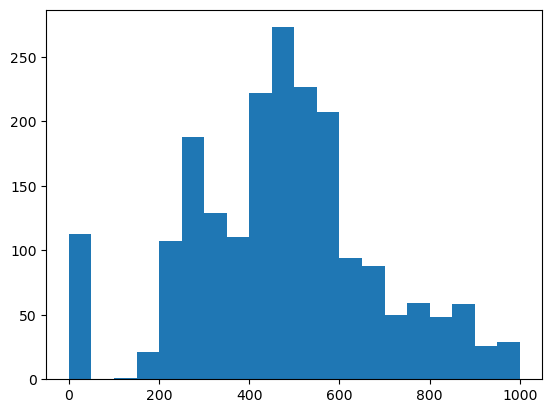

In [108]:
plt.hist(features1['garage_area'], bins = 20);

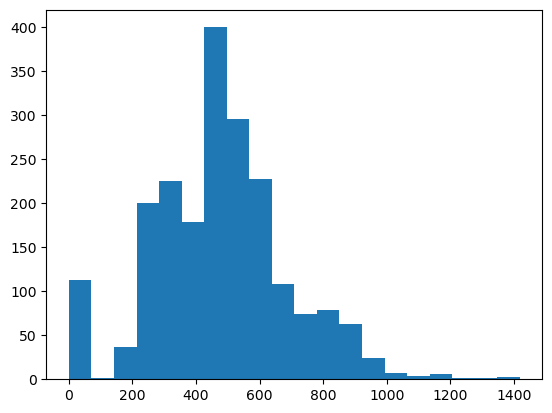

In [109]:
plt.hist(num_data['garage_area'], bins = 20);

In [110]:
features1.head()

totrms_abvgrd  garage_area  overall_qual  1st_flr_sf
0              6        475.0             6         725
1              8        559.0             7         913
2              5        246.0             5        1057
3              7        400.0             5         744
4              6        484.0             6         831

In [111]:
X = features1
y = log_saleprice
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size = 0.6,
                                                   random_state =42)

In [112]:
features1[features1['garage_area'] > 1000]

Empty DataFrame
Columns: [totrms_abvgrd, garage_area, overall_qual, 1st_flr_sf]
Index: []

In [113]:
features1[features1['garage_area'] > 1000]

Empty DataFrame
Columns: [totrms_abvgrd, garage_area, overall_qual, 1st_flr_sf]
Index: []

In [114]:
X = features1[['overall_qual']]
y = num_data['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size= 0.3,
                                                   random_state = 42)

In [115]:
features1['garage_area'] = num_data['garage_area']

In [116]:
features1['garage_area'].fillna(474, inplace = True)

In [117]:
features1['garage_area'] = features1['garage_area'].replace(0, 474)

In [118]:
poly = PolynomialFeatures(include_bias=False)
X = features1
poly.fit(X)
X_poly = poly.transform(X)
poly.get_feature_names(X.columns)

['totrms_abvgrd',
 'garage_area',
 'overall_qual',
 '1st_flr_sf',
 'totrms_abvgrd^2',
 'totrms_abvgrd garage_area',
 'totrms_abvgrd overall_qual',
 'totrms_abvgrd 1st_flr_sf',
 'garage_area^2',
 'garage_area overall_qual',
 'garage_area 1st_flr_sf',
 'overall_qual^2',
 'overall_qual 1st_flr_sf',
 '1st_flr_sf^2']

In [119]:
X_poly.shape

(2051, 14)

In [120]:
y = num_data['saleprice']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, 
                                                    train_size = 0.7,
                                                   random_state =42)

In [122]:
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)
print(lr_poly.score(X_train, y_train))
print(lr_poly.score(X_test, y_test))

0.8106399447837259
0.8143535690298994


In [123]:
poly = PolynomialFeatures(include_bias=False)
X = features2
poly.fit(X)
X_poly = poly.transform(X)
poly.get_feature_names(X.columns)

['totrms_abvgrd',
 'garage_area',
 'overall_qual',
 '1st_flr_sf',
 'half_bath',
 'full_bath',
 'gr_liv_area',
 'bsmt_full_bath',
 'totrms_abvgrd^2',
 'totrms_abvgrd garage_area',
 'totrms_abvgrd overall_qual',
 'totrms_abvgrd 1st_flr_sf',
 'totrms_abvgrd half_bath',
 'totrms_abvgrd full_bath',
 'totrms_abvgrd gr_liv_area',
 'totrms_abvgrd bsmt_full_bath',
 'garage_area^2',
 'garage_area overall_qual',
 'garage_area 1st_flr_sf',
 'garage_area half_bath',
 'garage_area full_bath',
 'garage_area gr_liv_area',
 'garage_area bsmt_full_bath',
 'overall_qual^2',
 'overall_qual 1st_flr_sf',
 'overall_qual half_bath',
 'overall_qual full_bath',
 'overall_qual gr_liv_area',
 'overall_qual bsmt_full_bath',
 '1st_flr_sf^2',
 '1st_flr_sf half_bath',
 '1st_flr_sf full_bath',
 '1st_flr_sf gr_liv_area',
 '1st_flr_sf bsmt_full_bath',
 'half_bath^2',
 'half_bath full_bath',
 'half_bath gr_liv_area',
 'half_bath bsmt_full_bath',
 'full_bath^2',
 'full_bath gr_liv_area',
 'full_bath bsmt_full_bath',
 'gr_

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, 
                                                    train_size = 0.6,
                                                   random_state =42)

In [125]:
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)
print(lr_poly.score(X_train, y_train))
print(lr_poly.score(X_test, y_test))

0.8769369095802826
0.8648817337530021


In [126]:
features2.columns

Index(['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf',
       'half_bath', 'full_bath', 'gr_liv_area', 'bsmt_full_bath'],
      dtype='object')

In [127]:
poly_dftest =  df_test[['overall_qual', 'totrms_abvgrd', 
                           'garage_area', '1st_flr_sf', 'full_bath',
                           'gr_liv_area', 'bsmt_full_bath', 
                            'half_bath']]

In [128]:
poly_test = PolynomialFeatures(include_bias=False)
X_dftest = poly_dftest
poly_test.fit(X_dftest)
X_polyt = poly.transform(X_dftest)
poly_test.get_feature_names(X_dftest.columns)

['overall_qual',
 'totrms_abvgrd',
 'garage_area',
 '1st_flr_sf',
 'full_bath',
 'gr_liv_area',
 'bsmt_full_bath',
 'half_bath',
 'overall_qual^2',
 'overall_qual totrms_abvgrd',
 'overall_qual garage_area',
 'overall_qual 1st_flr_sf',
 'overall_qual full_bath',
 'overall_qual gr_liv_area',
 'overall_qual bsmt_full_bath',
 'overall_qual half_bath',
 'totrms_abvgrd^2',
 'totrms_abvgrd garage_area',
 'totrms_abvgrd 1st_flr_sf',
 'totrms_abvgrd full_bath',
 'totrms_abvgrd gr_liv_area',
 'totrms_abvgrd bsmt_full_bath',
 'totrms_abvgrd half_bath',
 'garage_area^2',
 'garage_area 1st_flr_sf',
 'garage_area full_bath',
 'garage_area gr_liv_area',
 'garage_area bsmt_full_bath',
 'garage_area half_bath',
 '1st_flr_sf^2',
 '1st_flr_sf full_bath',
 '1st_flr_sf gr_liv_area',
 '1st_flr_sf bsmt_full_bath',
 '1st_flr_sf half_bath',
 'full_bath^2',
 'full_bath gr_liv_area',
 'full_bath bsmt_full_bath',
 'full_bath half_bath',
 'gr_liv_area^2',
 'gr_liv_area bsmt_full_bath',
 'gr_liv_area half_bath',
 

In [129]:
X_polyt

array([[  6.,   9., 440., ...,   0.,   0.,   0.],
       [  5.,  10., 580., ...,   0.,   0.,   0.],
       [  7.,   7., 426., ...,   1.,   1.,   1.],
       ...,
       [  5.,   5., 322., ...,   0.,   0.,   0.],
       [  4.,   5., 528., ...,   0.,   0.,   0.],
       [  5.,   5., 390., ...,   1.,   0.,   0.]])

In [130]:
preds3 = lr_poly.predict(X_polyt)

In [131]:
df_test['saleprice1'] = preds3

In [132]:
final_submission = df_test[['id', 'saleprice1']]

In [133]:
final_submission.set_index('id', inplace=True) 
final_submission.to_csv('fin_submission.csv') 

In [134]:
print(list(zip(preds, preds3)))

[(178526.00806510425, 8022673114.356978), (191930.58113842073, 8399299196.370537), (208611.4600159094, 4779135108.338271), (114437.10255773144, 1958192509.2757158), (195585.8647949376, 4149466052.799237), (78318.86759483223, 2538068532.6750283), (85758.23284936597, 2567336152.605631), (127020.71908218201, 3465175806.6875787), (199357.93473404093, 6016680083.332338), (165807.09263977397, 3501329890.650124), (160803.7643289212, 3157686689.3454866), (135825.53545580237, 2309761423.6241345), (161263.92310076178, 4059159401.42044), (321939.1361717247, 16747533167.652283), (161426.5266224817, 7210924978.702806), (126795.04529353388, 3885435542.8675656), (183187.95568412356, 4266408114.9266114), (131618.914459921, 2463164112.4688354), (208876.9741008344, 6829630978.9948225), (225041.64805590484, 6504799523.641151), (129313.07615506169, 2412500768.1072197), (141517.11143528234, 1428301417.3194115), (204392.33000403194, 5640821138.460604), (161794.94802618405, 2021086802.1759915), (196435.91280

In [135]:
features1[features1['garage_area'] == 0]

Empty DataFrame
Columns: [totrms_abvgrd, garage_area, overall_qual, 1st_flr_sf]
Index: []

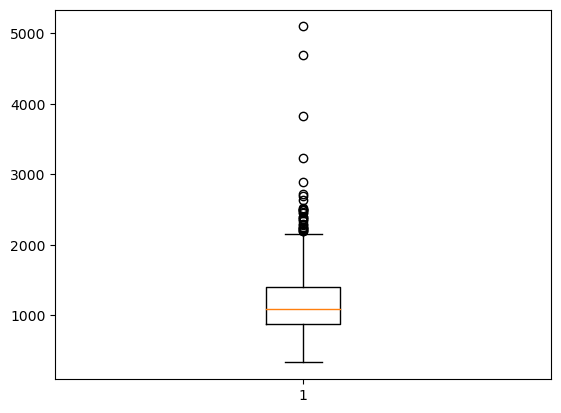

In [136]:
plt.boxplot(features1['1st_flr_sf']);

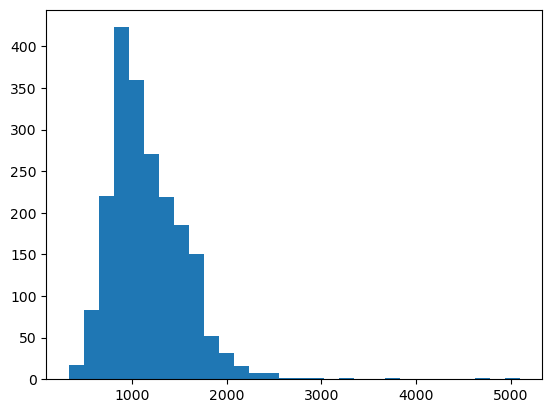

In [137]:
plt.hist(num_data['1st_flr_sf'], bins =30);

In [138]:
features1['1st_flr_sf'] = np.where(num_data['1st_flr_sf'] >= 2000, 2000, 
         num_data['1st_flr_sf'])

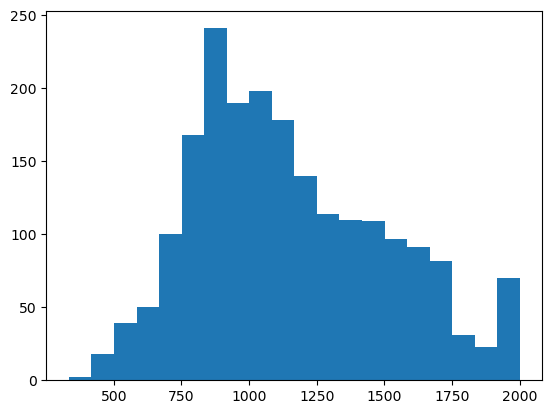

In [139]:
plt.hist(features1['1st_flr_sf'], bins = 20);

In [140]:
X = features1
y = num_data['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size = 0.7,
                                                   random_state =42)

In [141]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7550751786817728
0.7911435742397522


In [142]:
features1.totrms_abvgrd.describe()

count    2051.000000
mean        6.435885
std         1.560225
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: totrms_abvgrd, dtype: float64

In [143]:
features1.isnull().sum()

totrms_abvgrd    0
garage_area      0
overall_qual     0
1st_flr_sf       0
dtype: int64

In [144]:
X = features1

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

In [146]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [147]:
lr = LinearRegression()

In [148]:
lr.fit(X_train, y_train)

print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7565006663513271
Testing R2 = 0.7933138483761979


In [149]:
features2

totrms_abvgrd  garage_area  overall_qual  1st_flr_sf  half_bath  \
0                 6        475.0             6         725          1   
1                 8        559.0             7         913          1   
2                 5        246.0             5        1057          0   
3                 7        400.0             5         744          1   
4                 6        484.0             6         831          0   
5                 6        578.0             6        1888          1   
6                 5        525.0             6        1072          0   
7                 6        531.0             5        1188          0   
8                 6        420.0             5         924          0   
9                 9        504.0             5        1040          2   
10                4        264.0             6         483          1   
11                6        632.0             7        1208          0   
12                7        576.0             5        1288          0   
13                7        480.0             8         962          1   
14                6        610.0             7        1361          0   
15                7        624.0             5        1430          0   
16                7        513.0             5         624          0   
17                5        480.0             5        1121          0   
18                7        528.0             6        1285          1   
19                7        614.0             7         764          1   
20                5        450.0             5         894          0   
21                5        499.0             8        1659          0   
22                8        575.0             8        1209          1   
23                6        420.0             6        1187          0   
24                5        572.0             5        1056          0   
25                6        530.0             6        1453          0   
26                5        336.0             5         894          0   
27                7        240.0             5        1265          0   
28                9          0.0             5        1034          0   
29                6        576.0             5         672          0   
30                9        542.0             8        2524          1   
31                7        400.0             8         792          0   
32                6        481.0             8        1494          1   
33                5        410.0             6         948          0   
34                7        826.0             8        1718          0   
35                5        384.0             6        1142          0   
36                6        336.0             5         925          0   
37                7        546.0             6        1844          0   
38                6        528.0             7        1242          1   
39                5        384.0             5         990          0   
40                6        276.0             5        1256          1   
41                7        850.0            10        2076          1   
42                4        602.0             5        1110          0   
43                7        352.0             5        1050          0   
44                5        384.0             5        1040          0   
45                9        786.0             8         983          1   
46                6        660.0             5         984          0   
47                6        270.0             7         851          1   
48                6        280.0             5        1063          0   
49                6        474.0             7         764          1   
50                4        440.0             6         768          1   
51                7        576.0             4        1328          0   
52               12        564.0             7        1392          1   
53                5          0.0             4         546      

In [150]:
X = features2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7738939038732361
Testing R2 = 0.8235117179531378


In [151]:
features1['totrms_abvgrd'].describe()

count    2051.000000
mean        6.435885
std         1.560225
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: totrms_abvgrd, dtype: float64

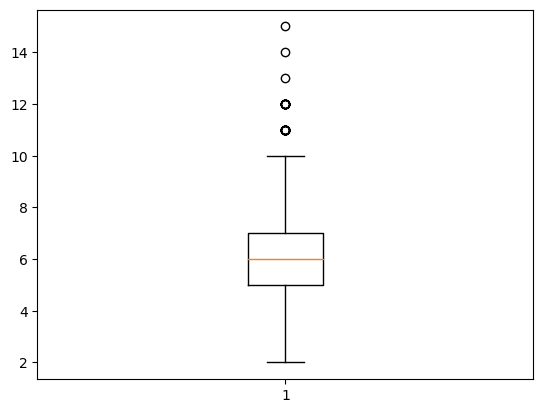

In [152]:
plt.boxplot(features1['totrms_abvgrd']);

In [153]:
##Removing outliers in totrms_abvgrd
features1['totrms_abvgrd'] = np.where(features1['totrms_abvgrd'] > 10,
                                     10, features1['totrms_abvgrd'])

In [154]:
features1['totrms_abvgrd'].max()

10

In [155]:
X = features1

In [156]:
X = features1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7566246108007695
Testing R2 = 0.7958047604038732


In [157]:
features1.columns

Index(['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf'], dtype='object')

In [158]:
preds = lr.predict(df_test[['overall_qual', 'totrms_abvgrd', 
                           'garage_area', '1st_flr_sf']])
df_test['saleprice'] = preds
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('new_submission1.csv') 

In [159]:
new_features = features1[['garage_area', 'overall_qual',
                          '1st_flr_sf']]

In [160]:
X = new_features
y = num_data['saleprice']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7358454156862224
Testing R2 = 0.7907047128691379


In [162]:
preds = lr.predict(df_test[['overall_qual', 'garage_area', 
                            '1st_flr_sf']])
df_test['saleprice'] = preds
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('new_submission2.csv') 

In [163]:
df_test['overall_qual'].isnull().sum()

0

In [164]:
new_features2 = features1[['garage_area', 'overall_qual',
                          'totrms_abvgrd']]

In [165]:
X = new_features2

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7231617543484151
Testing R2 = 0.7524981332166712


In [167]:
df_test['garage_area'].max()

1488

In [168]:
#Basement Quality, Central Air and Garage Finish appears to be 
#good variables to explore

In [169]:
cat_data['bsmt_qual'].isnull().sum()

55

In [170]:
cat_data['bsmt_qual'].fillna("Po", inplace = True)

In [171]:
cat_cols = cat_data[['bsmt_qual', 'garage_finish', 
                          'central_air']]

In [172]:
new_features3 = pd.concat([cat_cols, new_features2], axis = 1)

In [173]:
new_features3.head()

bsmt_qual garage_finish central_air  garage_area  overall_qual  \
0        TA           RFn           Y        475.0             6   
1        Gd           RFn           Y        559.0             7   
2        TA           Unf           Y        246.0             5   
3        Gd           Fin           Y        400.0             5   
4        Fa           Unf           Y        484.0             6   

   totrms_abvgrd  
0              6  
1              8  
2              5  
3              7  
4              6

In [174]:
new_features3.shape

(2051, 6)

In [175]:
ohe = OneHotEncoder()
ohe.fit_transform(new_features3)

<2051x543 sparse matrix of type '<class 'numpy.float64'>'
	with 12306 stored elements in Compressed Sparse Row format>

In [176]:
cat_data['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po     56
Name: bsmt_qual, dtype: int64

In [177]:
df_test['bsmt_qual'].isnull().sum()

0

In [178]:
X = new_features3
X.head()

bsmt_qual garage_finish central_air  garage_area  overall_qual  \
0        TA           RFn           Y        475.0             6   
1        Gd           RFn           Y        559.0             7   
2        TA           Unf           Y        246.0             5   
3        Gd           Fin           Y        400.0             5   
4        Fa           Unf           Y        484.0             6   

   totrms_abvgrd  
0              6  
1              8  
2              5  
3              7  
4              6

In [179]:
column_trans = make_column_transformer(
(OneHotEncoder(), ['bsmt_qual', 'garage_finish', 'central_air']), 
remainder = 'passthrough')

In [180]:
column_trans.fit_transform(X)

array([[  0.,   0.,   0., ..., 475.,   6.,   6.],
       [  0.,   0.,   1., ..., 559.,   7.,   8.],
       [  0.,   0.,   0., ..., 246.,   5.,   5.],
       ...,
       [  0.,   0.,   0., ..., 342.,   6.,   9.],
       [  0.,   0.,   0., ..., 294.,   4.,   6.],
       [  0.,   0.,   0., ..., 442.,   7.,   7.]])

In [181]:
lr = LinearRegression()

In [182]:
X.shape

(2051, 6)

In [183]:
pipe = make_pipeline(column_trans, lr)
cross_val_score(pipe,X,y, cv =5).mean()

0.7762408306512576

In [184]:
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['bsmt_qual', 'garage_finish',
                                                   'central_air'])])),
                ('linearregression', LinearRegression())])

In [185]:
X_new = df_test[['bsmt_qual', 'garage_finish', 'central_air', 
                'garage_area', 'overall_qual', 'totrms_abvgrd']]

In [186]:
X_new['bsmt_qual'].fillna('Po', inplace = True)

In [187]:
pipe_preds = pipe.predict(X_new)

In [188]:
df_test['saleprice'] = pipe_preds
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('new_submission3.csv') 

In [189]:
#It appears that Kitchen_qual, Electrical, Land_contour and foundation
#may be effecting the saleprice

In [190]:
cat_cols1 = cat_data[['kitchen_qual', 'electrical']]

In [191]:
new_features4 = pd.concat([cat_cols1, new_features3], axis = 1)

In [192]:
X = new_features4

In [193]:
column_trans1 = make_column_transformer(
(OneHotEncoder(), ['kitchen_qual', 'electrical', 'bsmt_qual', 'garage_finish', 'central_air']), 
remainder = 'passthrough')

In [194]:
column_trans1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['kitchen_qual', 'electrical', 'bsmt_qual',
                                  'garage_finish', 'central_air'])])

In [195]:
column_trans1.fit_transform(X)
pipe1 = make_pipeline(column_trans1, lr)
cross_val_score(pipe1,X,y, cv =5)

array([0.80936346, 0.81914781, 0.78104922, 0.7929291 , 0.77202616])

In [196]:
pipe1.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['kitchen_qual', 'electrical',
                                                   'bsmt_qual', 'garage_finish',
                                                   'central_air'])])),
                ('linearregression', LinearRegression())])

In [197]:
cat_cols2 = cat_data[['land_contour', 'foundation']]

In [198]:
new_features5 = pd.concat([cat_cols2, new_features4], axis = 1)

In [199]:
X = new_features5

In [200]:
new_features5.head()

land_contour foundation kitchen_qual electrical bsmt_qual garage_finish  \
0          Lvl     CBlock           Gd      SBrkr        TA           RFn   
1          Lvl      PConc           Gd      SBrkr        Gd           RFn   
2          Lvl     CBlock           Gd      SBrkr        TA           Unf   
3          Lvl      PConc           TA      SBrkr        Gd           Fin   
4          Lvl      PConc           TA      SBrkr        Fa           Unf   

  central_air  garage_area  overall_qual  totrms_abvgrd  
0           Y        475.0             6              6  
1           Y        559.0             7              8  
2           Y        246.0             5              5  
3           Y        400.0             5              7  
4           Y        484.0             6              6

In [201]:
column_trans2 = make_column_transformer(
(OneHotEncoder(), ['land_contour', 'foundation', 'kitchen_qual', 'electrical', 'bsmt_qual', 'garage_finish', 'central_air']), 
remainder = 'passthrough')
column_trans2.fit_transform(X)
pipe2 = make_pipeline(column_trans2, lr)
cross_val_score(pipe2,X,y, cv =5)

array([0.81381977,        nan, 0.79562662, 0.79578964, 0.77354024])

In [202]:
cat_cols3 = cat_data[['street', 'exter_qual', 'utilities']]

In [203]:
new_features6 = pd.concat([cat_cols3, new_features4], axis = 1)

In [204]:
new_features6.head()

street exter_qual utilities kitchen_qual electrical bsmt_qual garage_finish  \
0   Pave         Gd    AllPub           Gd      SBrkr        TA           RFn   
1   Pave         Gd    AllPub           Gd      SBrkr        Gd           RFn   
2   Pave         TA    AllPub           Gd      SBrkr        TA           Unf   
3   Pave         TA    AllPub           TA      SBrkr        Gd           Fin   
4   Pave         TA    AllPub           TA      SBrkr        Fa           Unf   

  central_air  garage_area  overall_qual  totrms_abvgrd  
0           Y        475.0             6              6  
1           Y        559.0             7              8  
2           Y        246.0             5              5  
3           Y        400.0             5              7  
4           Y        484.0             6              6

In [205]:
from sklearn.linear_model import Lasso, Ridge

In [206]:
new_features6.head()

street exter_qual utilities kitchen_qual electrical bsmt_qual garage_finish  \
0   Pave         Gd    AllPub           Gd      SBrkr        TA           RFn   
1   Pave         Gd    AllPub           Gd      SBrkr        Gd           RFn   
2   Pave         TA    AllPub           Gd      SBrkr        TA           Unf   
3   Pave         TA    AllPub           TA      SBrkr        Gd           Fin   
4   Pave         TA    AllPub           TA      SBrkr        Fa           Unf   

  central_air  garage_area  overall_qual  totrms_abvgrd  
0           Y        475.0             6              6  
1           Y        559.0             7              8  
2           Y        246.0             5              5  
3           Y        400.0             5              7  
4           Y        484.0             6              6

In [207]:
X.head()

land_contour foundation kitchen_qual electrical bsmt_qual garage_finish  \
0          Lvl     CBlock           Gd      SBrkr        TA           RFn   
1          Lvl      PConc           Gd      SBrkr        Gd           RFn   
2          Lvl     CBlock           Gd      SBrkr        TA           Unf   
3          Lvl      PConc           TA      SBrkr        Gd           Fin   
4          Lvl      PConc           TA      SBrkr        Fa           Unf   

  central_air  garage_area  overall_qual  totrms_abvgrd  
0           Y        475.0             6              6  
1           Y        559.0             7              8  
2           Y        246.0             5              5  
3           Y        400.0             5              7  
4           Y        484.0             6              6

In [208]:
X = new_features6
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [209]:
column_trans3 = make_column_transformer(
(OneHotEncoder(), ['street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 'garage_finish', 'central_air']), 
remainder = 'passthrough')
column_trans3.fit_transform(X)
pipe3 = make_pipeline(column_trans3, lasso)
cross_val_score(pipe3,X,y, cv = 5)

array([0.81223382,        nan, 0.78352719, 0.7947571 , 0.7786675 ])

In [210]:
cat_data['paved_drive'].value_counts()

Y    1861
N     151
P      39
Name: paved_drive, dtype: int64

In [211]:
cat_cols3.head()

street exter_qual utilities
0   Pave         Gd    AllPub
1   Pave         Gd    AllPub
2   Pave         TA    AllPub
3   Pave         TA    AllPub
4   Pave         TA    AllPub

In [212]:
new_features6.columns

Index(['street', 'exter_qual', 'utilities', 'kitchen_qual', 'electrical',
       'bsmt_qual', 'garage_finish', 'central_air', 'garage_area',
       'overall_qual', 'totrms_abvgrd'],
      dtype='object')

In [213]:
new_features6['paved_drive'] = cat_data['paved_drive']

In [214]:
new_features6.columns

Index(['street', 'exter_qual', 'utilities', 'kitchen_qual', 'electrical',
       'bsmt_qual', 'garage_finish', 'central_air', 'garage_area',
       'overall_qual', 'totrms_abvgrd', 'paved_drive'],
      dtype='object')

In [215]:
X = new_features6

In [216]:
column_trans3 = make_column_transformer(
(OneHotEncoder(), ['street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 
                   'garage_finish', 'central_air', 'paved_drive']),
remainder = 'passthrough')
column_trans3.fit_transform(X)
pipe3 = make_pipeline(column_trans3, lr)
cross_val_score(pipe3,X,y, cv = 10)

array([0.81418576, 0.81050381,        nan, 0.8252133 , 0.71884587,
       0.83036116, 0.79352543, 0.79624687, 0.83039941, 0.70306172])

In [217]:
# using std scaler on numeric variables
column_trans3 = make_column_transformer(
(StandardScaler(), ['garage_area' ,'overall_qual', 'totrms_abvgrd']),
(OneHotEncoder(), ['street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 
                   'garage_finish', 'central_air', 'paved_drive']),
remainder = 'passthrough')
column_trans3.fit_transform(X)
pipe3 = make_pipeline(column_trans3, lr)
cross_val_score(pipe3,X,y, cv = 10)

array([0.81432213, 0.81022015,        nan, 0.82518757, 0.71910808,
       0.83043537, 0.79350867, 0.79643483, 0.83073114, 0.70300915])

In [218]:
num_data['fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

In [219]:
new_features7 = num_data[['full_bath', 'fireplaces']]

In [220]:
new_features7 = pd.concat([new_features7, new_features6], axis = 1)

In [221]:
new_features7.head()

full_bath  fireplaces street exter_qual utilities kitchen_qual electrical  \
0          2           0   Pave         Gd    AllPub           Gd      SBrkr   
1          2           1   Pave         Gd    AllPub           Gd      SBrkr   
2          1           0   Pave         TA    AllPub           Gd      SBrkr   
3          2           0   Pave         TA    AllPub           TA      SBrkr   
4          2           0   Pave         TA    AllPub           TA      SBrkr   

  bsmt_qual garage_finish central_air  garage_area  overall_qual  \
0        TA           RFn           Y        475.0             6   
1        Gd           RFn           Y        559.0             7   
2        TA           Unf           Y        246.0             5   
3        Gd           Fin           Y        400.0             5   
4        Fa           Unf           Y        484.0             6   

   totrms_abvgrd paved_drive  
0              6           Y  
1              8           Y  
2              5           Y  
3              7           Y  
4              6           N

In [222]:
X = new_features7

In [223]:
lr = LinearRegression()

In [224]:
X.shape

(2051, 14)

In [225]:
column_trans4 = make_column_transformer(
(OneHotEncoder(), ['street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 
                   'garage_finish', 'central_air', 'paved_drive']),
remainder = 'passthrough')
column_trans4.fit_transform(X)
pipe4 = make_pipeline(column_trans4, lr)
cross_val_score(pipe4,X,y, cv = 5)

array([0.82045218,        nan, 0.8025062 , 0.80837713, 0.79463159])

In [226]:
df_test['kitchen_qual'] = np.where(df_test['kitchen_qual'] == "Po", "Fa", 
         df_test['kitchen_qual'])

In [227]:
X_new6 = df_test[['full_bath', 'fireplaces', 'street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 
                   'garage_finish', 'central_air', 'paved_drive',
                'garage_area', 'overall_qual', 'totrms_abvgrd']]

In [228]:
pipe3.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['garage_area',
                                                   'overall_qual',
                                                   'totrms_abvgrd']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['street', 'exter_qual',
                                                   'utilities', 'kitchen_qual',
                                                   'electrical', 'bsmt_qual',
                                                   'garage_finish',
                                                   'central_air',
                                                   'paved_driv

In [229]:
pipe_preds6 = pipe3.predict(X_new6)

In [230]:
X.columns

Index(['full_bath', 'fireplaces', 'street', 'exter_qual', 'utilities',
       'kitchen_qual', 'electrical', 'bsmt_qual', 'garage_finish',
       'central_air', 'garage_area', 'overall_qual', 'totrms_abvgrd',
       'paved_drive'],
      dtype='object')

In [231]:
df_test['electrical'].isnull().sum()

0

In [232]:
X_new6.isnull().sum()

full_bath        0
fireplaces       0
street           0
exter_qual       0
utilities        0
kitchen_qual     0
electrical       0
bsmt_qual        0
garage_finish    0
central_air      0
paved_drive      0
garage_area      0
overall_qual     0
totrms_abvgrd    0
dtype: int64

In [233]:
df_test['saleprice'] = pipe_preds6
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('new_submission4.csv') 

In [234]:
# using poly features on numeric variables
column_trans3 = make_column_transformer(
(PolynomialFeatures(), ['garage_area' ,'overall_qual']),
(OneHotEncoder(), ['street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 
                   'garage_finish', 'central_air', 'paved_drive']),
remainder = 'passthrough')
column_trans3.fit_transform(X)
pipe3 = make_pipeline(column_trans3, lr)
cross_val_score(pipe3,X,y, cv = 5)

array([0.82599573,        nan, 0.79304497, 0.82888476, 0.79883284])

In [235]:
newcatcols = cat_data[['garage_cond', 'sale_type']]

In [236]:
features8 = pd.concat([newcatcols, new_features6], axis = 1)

In [237]:
X = features8
lr = LinearRegression()

In [238]:
column_trans5 = make_column_transformer(
(OneHotEncoder(), ['garage_cond', 'sale_type' ,'street', 'exter_qual', 'utilities' , 
                   'kitchen_qual', 'electrical', 'bsmt_qual', 
                   'garage_finish', 'central_air', 'paved_drive']),
remainder = 'passthrough')
column_trans5.fit_transform(X)
pipe5 = make_pipeline(column_trans5, lr)
cross_val_score(pipe5,X,y, cv = 10)

array([0.81327909, 0.80279468,        nan, 0.82530755, 0.71498404,
       0.82722698, 0.79559991, 0.797402  , 0.82947645, 0.69708681])

In [239]:
num_data.head()

ms_subclass  lot_frontage  lot_area  overall_qual  overall_cond  \
0           60           NaN     13517             6             8   
1           60          43.0     11492             7             5   
2           20          68.0      7922             5             7   
3           60          73.0      9802             5             5   
4           50          82.0     14235             6             8   

   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  bsmtfin_sf_2  ...  \
0        1976            2005         289.0         533.0           0.0  ...   
1        1996            1997         132.0         637.0           0.0  ...   
2        1953            2007           0.0         731.0           0.0  ...   
3        2006            2007           0.0           0.0           0.0  ...   
4        1900            1993           0.0           0.0           0.0  ...   

   wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  \
0             0             44               0           0             0   
1             0             74               0           0             0   
2             0             52               0           0             0   
3           100              0               0           0             0   
4             0             59               0           0             0   

   pool_area  misc_val  mo_sold  yr_sold  saleprice  
0          0         0        3     2010     130500  
1          0         0        4     2009     220000  
2          0         0        1     2010     109000  
3          0         0        4     2010     174000  
4          0         0        3     2010     138500  

[5 rows x 37 columns]

In [240]:
features2.head()

totrms_abvgrd  garage_area  overall_qual  1st_flr_sf  half_bath  full_bath  \
0              6        475.0             6         725          1          2   
1              8        559.0             7         913          1          2   
2              5        246.0             5        1057          0          1   
3              7        400.0             5         744          1          2   
4              6        484.0             6         831          0          2   

   gr_liv_area  bsmt_full_bath  
0         1479             0.0  
1         2122             1.0  
2         1057             1.0  
3         1444             0.0  
4         1445             0.0

In [241]:
newcat = pd.concat([cat_cols, cat_cols1, cat_cols2, cat_cols3],
                   axis =1)
newcat.head()

bsmt_qual garage_finish central_air kitchen_qual electrical land_contour  \
0        TA           RFn           Y           Gd      SBrkr          Lvl   
1        Gd           RFn           Y           Gd      SBrkr          Lvl   
2        TA           Unf           Y           Gd      SBrkr          Lvl   
3        Gd           Fin           Y           TA      SBrkr          Lvl   
4        Fa           Unf           Y           TA      SBrkr          Lvl   

  foundation street exter_qual utilities  
0     CBlock   Pave         Gd    AllPub  
1      PConc   Pave         Gd    AllPub  
2     CBlock   Pave         TA    AllPub  
3      PConc   Pave         TA    AllPub  
4      PConc   Pave         TA    AllPub

In [242]:
newcat['garage_finish'].fillna("Unf", inplace = True)

In [243]:
newfeat = pd.concat([features2, newcat], axis = 1)

In [244]:
newcat.columns

Index(['bsmt_qual', 'garage_finish', 'central_air', 'kitchen_qual',
       'electrical', 'land_contour', 'foundation', 'street', 'exter_qual',
       'utilities'],
      dtype='object')

In [245]:
col_list = ['bsmt_qual', 'garage_finish', 'central_air', 'kitchen_qual',
       'electrical', 'land_contour', 'foundation', 'street', 'exter_qual',
       'utilities']

In [246]:
X = newfeat

In [247]:
column_trans8 = make_column_transformer(
(PolynomialFeatures(), ['garage_area' ,'overall_qual', 'totrms_abvgrd',
                                             '1st_flr_sf', 'half_bath', 'full_bath', 
                       'gr_liv_area']),
(OneHotEncoder(), ['bsmt_qual', 'garage_finish', 'central_air', 'kitchen_qual',
       'electrical', 'land_contour', 'foundation', 'street', 'exter_qual',
       'utilities']),
remainder = 'passthrough')
column_trans8.fit_transform(X)
pipe8 = make_pipeline(column_trans8, ridge)
cross_val_score(pipe8,X,y, cv = 10)

array([0.87965085, 0.8781772 ,        nan,        nan, 0.81176694,
       0.88757613, 0.88552001, 0.84610983, 0.89303818, 0.75223563])

In [248]:
dftest8 = df_test[['bsmt_qual', 'garage_finish', 'central_air', 'kitchen_qual',
       'electrical', 'land_contour', 'foundation', 'street', 'exter_qual',
       'utilities', 'totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf',
       'half_bath', 'full_bath', 'gr_liv_area', 'bsmt_full_bath']]

In [249]:
pipe8.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  ['garage_area',
                                                   'overall_qual',
                                                   'totrms_abvgrd',
                                                   '1st_flr_sf', 'half_bath',
                                                   'full_bath',
                                                   'gr_liv_area']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['bsmt_qual', 'garage_finish',
                                                   'central_air',
                                                   'kitchen_qual',

In [250]:
pipe8_preds = pipe8.predict(dftest8)

In [251]:
df_test['saleprice'] = pipe8_preds
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('sub5.csv') 

In [252]:
num_data['year_built'].isnull().sum()

0

In [253]:
df_test['year_built'].isnull().sum()

0

In [254]:
num_data['garage_yr_blt'].fillna(0, inplace = True)

In [255]:
df_test['garage_yr_blt'].fillna(0, inplace = True)

In [256]:
feat4 = num_data[['year_built', 'garage_yr_blt']]

In [257]:
feat_final = pd.concat([feat4, newfeat], axis = 1)

In [258]:
feat_final

year_built  garage_yr_blt  totrms_abvgrd  garage_area  overall_qual  \
0           1976         1976.0              6        475.0             6   
1           1996         1997.0              8        559.0             7   
2           1953         1953.0              5        246.0             5   
3           2006         2007.0              7        400.0             5   
4           1900         1957.0              6        484.0             6   
5           1966         1966.0              6        578.0             6   
6           2005         2005.0              5        525.0             6   
7           1959         1959.0              6        531.0             5   
8           1952         1952.0              6        420.0             5   
9           1969         1969.0              9        504.0             5   
10          1971         1971.0              4        264.0             6   
11          2005         2005.0              6        632.0             7   
12          1880         1900.0              7        576.0             5   
13          1999         2000.0              7        480.0             8   
14          2007         2007.0              6        610.0             7   
15          2004         2004.0              7        624.0             5   
16          1916         1916.0              7        513.0             5   
17          1963         1963.0              5        480.0             5   
18          1977         1977.0              7        528.0             6   
19          2009         2009.0              7        614.0             7   
20          1968         1968.0              5        450.0             5   
21          2000         2000.0              5        499.0             8   
22          2005         2005.0              8        575.0             8   
23          1992         1992.0              6        420.0             6   
24          1955         1955.0              5        572.0             5   
25          1961         1961.0              6        530.0             6   
26          1965         1973.0              5        336.0             5   
27          1937         1937.0              7        240.0             5   
28          1895            0.0              9          0.0             5   
29          1949         2003.0              6        576.0             5   
30          1981         1981.0              9        542.0             8   
31          1929         1931.0              7        400.0             8   
32          1995         1995.0              6        481.0             8   
33          1952         1952.0              5        410.0             6   
34          2007         2007.0              7        826.0             8   
35          1958         1958.0              5        384.0             6   
36          1977         1977.0              6        336.0             5   
37          1977         1977.0              7        546.0             6   
38          1973         1973.0              6        528.0             7   
39          1994         1995.0              5        384.0             5   
40          1965         1965.0              6        276.0             5   
41          2006         2006.0              7        850.0            10   
42          1978         1978.0              4        602.0             5   
43          1954         1954.0              7        352.0             5   
44          1965         1965.0              5        384.0             5   
45          1935         1935.0              9        786.0             8   
46          1941         1977.0              6        660.0             5   
47          1931         1931.0              6        270.0             7   
48          1954         1954.0              6        280.0             5   
49          2003         2003.0              6        474.0             7   
50          2000         2000.0              4        440.0             6   
51

In [259]:
X = feat_final

In [260]:
(PolynomialFeatures(), ['overall_qual','1st_flr_sf']),


((PolynomialFeatures(), ['overall_qual', '1st_flr_sf']),)

In [261]:
column_trans9 = make_column_transformer(
(StandardScaler(), ['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf',
       'half_bath', 'full_bath', 'gr_liv_area', 'bsmt_full_bath',
                        'overall_qual','1st_flr_sf', 'year_built',
                   'garage_yr_blt']),
(OneHotEncoder(), ['bsmt_qual', 'garage_finish', 'central_air', 
                   'kitchen_qual',
       'electrical', 'land_contour', 'foundation', 'street', 
                   'exter_qual','utilities']),
remainder = 'passthrough')
column_trans9.fit_transform(X)
pipe9 = make_pipeline(column_trans9, ridge)
cross_val_score(pipe9,X,y, cv = 10)

array([0.84935241, 0.86346982,        nan,        nan, 0.65510609,
       0.8801184 , 0.87628952, 0.83936466, 0.86324479, 0.69493644])

In [262]:
dftest9 = df_test[['bsmt_qual', 'garage_finish', 'central_air', 'kitchen_qual',
       'electrical', 'land_contour', 'foundation', 'street', 'exter_qual',
       'utilities', 'totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf',
       'half_bath', 'full_bath', 'gr_liv_area', 'bsmt_full_bath',
                  'year_built', 'garage_yr_blt']]

In [263]:
pipe9.fit(X,y)
pipe9_preds = pipe9.predict(dftest9)

In [264]:
df_test['saleprice'] = pipe9_preds
new_submission = df_test[['id', 'saleprice']]
new_submission.set_index('id', inplace=True) 
new_submission.to_csv('sub.csv')

In [265]:
features1.columns

Index(['totrms_abvgrd', 'garage_area', 'overall_qual', '1st_flr_sf'], dtype='object')

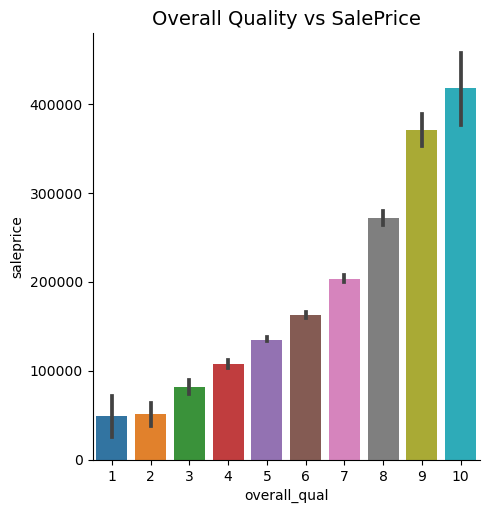

In [266]:
sns.catplot(x = 'overall_qual', y= 'saleprice',
           data = num_data, kind = 'bar')
plt.title("Overall Quality vs SalePrice", size = 14);

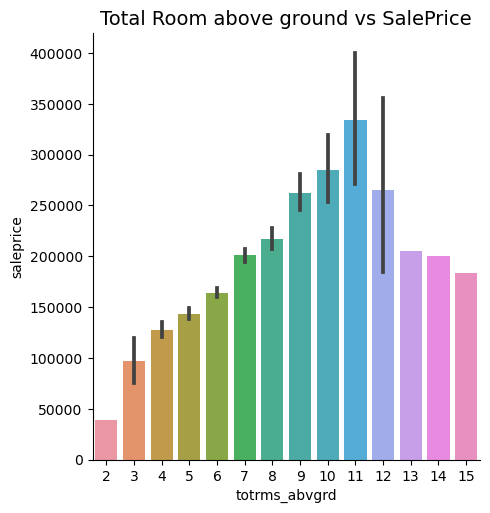

In [267]:
sns.catplot(x = 'totrms_abvgrd', y= 'saleprice',
           data = num_data, kind = 'bar')
plt.title("Total Room above ground vs SalePrice", size = 14);

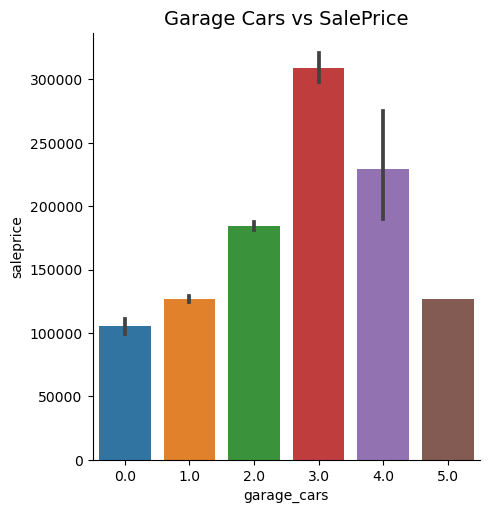

In [268]:
sns.catplot(x = 'garage_cars', y= 'saleprice',
           data = num_data, kind = 'bar')
plt.title("Garage Cars vs SalePrice", size = 14);

<Figure size 200x200 with 0 Axes>

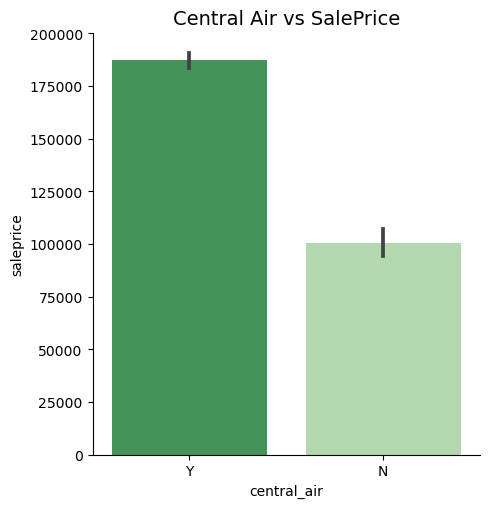

In [269]:
plt.figure(figsize = (2,2))
sns.catplot(x = 'central_air', y= 'saleprice',
           data = df1, kind = 'bar', palette = 'Greens_r')
plt.title("Central Air vs SalePrice", size = 14);

<Figure size 200x200 with 0 Axes>

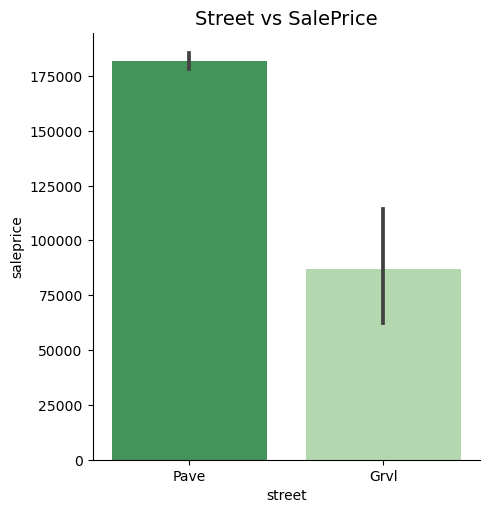

In [270]:
plt.figure(figsize = (2,2))
sns.catplot(x = 'street', y= 'saleprice',
           data = df1, kind = 'bar', palette = 'Greens_r')
plt.title("Street vs SalePrice", size = 14);

<Figure size 200x200 with 0 Axes>

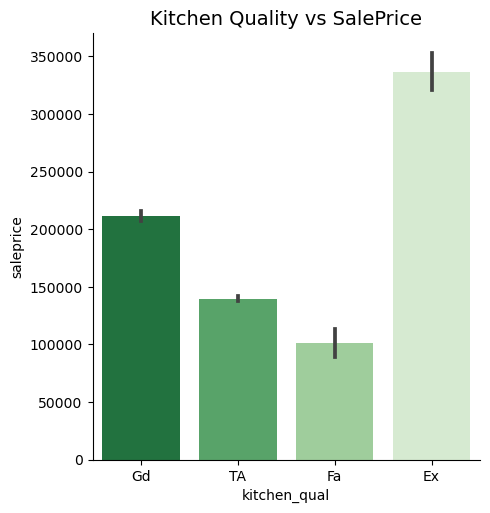

In [271]:
plt.figure(figsize = (2,2))
sns.catplot(x = 'kitchen_qual', y= 'saleprice',
           data = df1, kind = 'bar', palette = 'Greens_r')
plt.title("Kitchen Quality vs SalePrice", size = 14);

<Figure size 200x200 with 0 Axes>

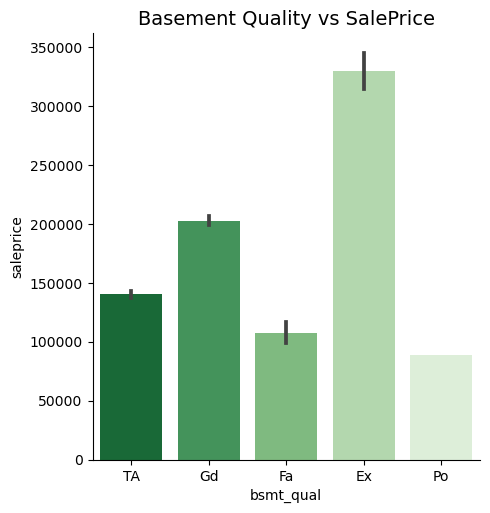

In [272]:
plt.figure(figsize = (2,2))
sns.catplot(x = 'bsmt_qual', y= 'saleprice',
           data = df1, kind = 'bar', palette = 'Greens_r')
plt.title("Basement Quality vs SalePrice", size = 14);

### Conclusion

#### It appears that the four colums total rooms above ground,m garage_area, overall_quality and 1st floor square feet are the 4 major factors explaining about 77% variability in sale price.

#### Some Categorical variables like Basement Quality, Kitchen quality, Central Air Condition, External Quality of the house are some of the other important factors people are considering when buying a house